Dataset information:


-> data - original data of customer

-> data_copy - processed data, use for clustering

-> data_goods - data for association rules

-> x_train1, y_train1, y_pred1 - for classification tree

-> x_train2, y_train2, y_pred2 - for regression tree

-> x_train3, y_train3, y_pred3 - for Multiple linear regression

-> x_train3, y_train3, y_pred3 - for cross validation



In [1]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import warnings
warnings.simplefilter("ignore")

# Read the Data

In [2]:
data = pd.read_excel(r"C:\Users\82102\Downloads\DSA_Team1_customer_data.xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 1. Basic EDA 

In [3]:
#get dimension of data
data.shape

(2240, 29)

In [4]:
# Data Statistical Analysis
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [5]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Missing values of data
# Income has 24 Missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# 2. Data Preparation 
## > data cleaning, filtering, transforming the data by EDA

- total spend = Number of spend items by consumer

- Dt_Customer = The days of registration by the consumer.

- Z_Revenue and Z_CostContact have unique value so it's meaningless when analyzing data. So I removed it

In [7]:
data['total_spend'] = (data.MntWines + data.MntFruits +data.MntMeatProducts 
                       + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds)
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])
data.drop('Z_Revenue', inplace=True, axis=1)
data.drop('Z_CostContact', inplace=True, axis=1)  # The sum of consumer goods is expressed in total_spend.

- Converting the year a consumer was born into age.
- If customer chan were born in 1999 >> 23 years old.

In [8]:
data["Year_Birth"] = 2021-data["Year_Birth"]+1
data.rename(columns = {'Year_Birth':'Age'},inplace = True) # I took out the day I was born in 2021 and changed my age

### EDA of Age
- The max age is 129 years old. It makes no sense for person born in the 19th century to be alive. 
So I will check the outliers.

In [9]:
data['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

<AxesSubplot:>

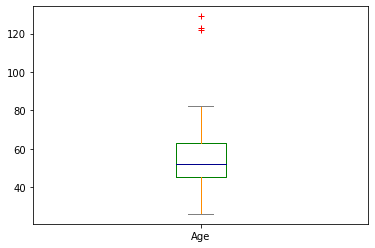

In [10]:
# Age column has Outlier
color = {
    "boxes" : "Green",
    "whiskers" : "DarkOrange",
    "medians" : "DarkBlue",
    "caps" : "Gray",
}

data['Age'].plot.box(color = color, sym ="r+")

In [11]:
# When the ages sorted in ascending order, 
# there were three people born in the 19th century. So i removed the data of three people.
data.sort_values(by='Age', ascending=[False]).head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend
239,11004,129,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,22
339,1150,123,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,1853
192,7829,122,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,65
1950,6663,82,PhD,Single,51141.0,0,0,2013-08-07,96,144,...,4,5,0,0,0,0,0,0,0,157
424,6932,81,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,2119


In [12]:
data.drop([239, 339, 192], inplace=True)

In [13]:
# EDA of marital_status. 
#'Absurd' means ridiculous so i removed this columns
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
data[data['Marital_Status']=='Absurd']

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend
2093,7734,29,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,7,1,0,0,1,1,0,0,1,1216
2134,4369,65,Master,Absurd,65487.0,0,0,2014-10-01,48,240,...,6,2,0,0,0,0,0,0,0,1169


In [15]:
data.drop([2093, 2134], inplace=True)

- 'Together', 'Married' mean Two people
- 'Divorce', 'widow', 'Alone', 'Yolo', 'Single' means One people

In [16]:
data['Marital_Status'] = data['Marital_Status'].replace({
    'Together': '2', 'Married': '2', 'Divorced': '1', 'Widow': '1',
    'Alone': '1','YOLO': '1', 'Single' : '1'
})
data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend
0,5524,65,Graduation,1,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,68,Graduation,1,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,57,Graduation,2,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,38,Graduation,2,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,41,PhD,2,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,422


In [17]:
data['Marital_Status'] = data['Marital_Status'].astype(int)

Households means how many people in house

In [18]:
data['Households'] = data.Marital_Status + data.Kidhome + data.Teenhome
data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend,Households
0,5524,65,Graduation,1,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,1617,1
1,2174,68,Graduation,1,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,27,3
2,4141,57,Graduation,2,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,776,2
3,6182,38,Graduation,2,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,53,3
4,5324,41,PhD,2,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,422,3


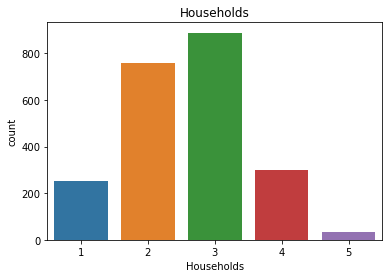

In [19]:
# households distribution
sns.countplot(x="Households", data=data)
plt.title("Households")
plt.show()

- Now, I will deal with the missing values of "income.
- First, we'll check the correlation between the columns
- Second, we will replace the missing values with the average of Income for each column most related to income.

In [20]:
# Income and total_spend seem to be the most related, (66.73%)
data.corr()

,ID,Age,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend,Households
ID,1.000000,-0.002248,0.021035,0.013615,0.002308,-0.003426,-0.046859,-0.021363,0.006698,-0.002320,...,-0.007818,-0.035930,-0.025260,-0.006185,-0.022772,-0.015014,0.031536,-0.022619,-0.015981,0.010415
Age,-0.002248,1.000000,0.000497,0.164300,-0.234867,0.363486,0.019994,0.163783,0.015075,0.030135,...,-0.118862,-0.061218,0.064286,-0.011948,0.011910,0.007611,0.004440,-0.016076,0.114557,0.079117
Marital_Status,0.021035,0.000497,1.000000,0.005050,0.022996,0.030051,-0.003712,-0.007347,-0.024493,-0.020342,...,0.001735,-0.018847,-0.006480,0.018279,0.010220,-0.003000,0.000867,-0.149730,-0.018445,0.559518
Income,0.013615,0.164300,0.005050,1.000000,-0.427905,0.019972,-0.003254,0.578512,0.429674,0.584583,...,-0.552355,-0.015865,0.184886,0.334445,0.276286,0.087749,-0.024842,0.132467,0.667305,-0.239190
Kidhome,0.002308,-0.234867,0.022996,-0.427905,1.000000,-0.036465,0.007646,-0.496436,-0.371909,-0.436932,...,0.447119,0.014404,-0.162040,-0.204428,-0.171816,-0.081905,0.036225,-0.079578,-0.556588,0.584350
Teenhome,-0.003426,0.363486,0.030051,0.019972,-0.036465,1.000000,0.017234,0.005539,-0.174981,-0.260513,...,0.133383,-0.043074,0.038570,-0.189474,-0.139319,-0.015767,0.007515,-0.154173,-0.137069,0.595027
Recency,-0.046859,0.019994,-0.003712,-0.003254,0.007646,0.017234,1.000000,0.016598,-0.003841,0.023768,...,-0.021762,-0.032944,0.018926,0.000461,-0.019851,-0.001750,0.005410,-0.199169,0.021085,0.012939
MntWines,-0.021363,0.163783,-0.007347,0.578512,-0.496436,0.005539,0.016598,1.000000,0.388614,0.562474,...,-0.320440,0.062246,0.373608,0.472544,0.354679,0.206071,-0.035920,0.247167,0.892025,-0.295493
MntFruits,0.006698,0.015075,-0.024493,0.429674,-0.371909,-0.174981,-0.003841,0.388614,1.000000,0.542375,...,-0.416186,0.015368,0.010786,0.209927,0.193081,-0.009558,-0.002678,0.124354,0.612731,-0.339021
MntMeatProducts,-0.002320,0.030135,-0.020342,0.584583,-0.436932,-0.260513,0.023768,0.562474,0.542375,1.000000,...,-0.539323,0.018502,0.103272,0.373957,0.311758,0.043179,-0.020675,0.237544,0.842897,-0.426852


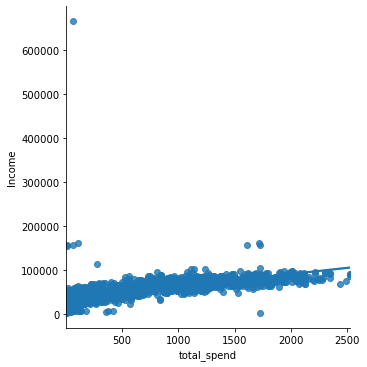

In [21]:
#they have positive correlation
sns.lmplot(x = "total_spend", y="Income", data = data)

In [22]:
#The Mean of income group by total spend.
data.groupby('total_spend')['Income'].mean() 

total_spend
5        3502.0
6       79392.5
8       56705.5
9       18303.0
10      24045.0
         ...   
2352    90226.0
2440    69098.0
2486    75759.0
2524    87679.0
2525    90638.0
Name: Income, Length: 1053, dtype: float64

In [23]:
cnt, bins = np.histogram(data.total_spend, bins=3)
print(cnt)
print(bins)

[1502  588  145]
[   5.  845. 1685. 2525.]


In [26]:
data['Spending_section']=pd.cut(x=data.total_spend, bins=bins, labels=['Low_spend','mid_spend','high_Spend'], include_lowest=True) 
data.Spending_section

0       mid_spend
1       Low_spend
2       Low_spend
3       Low_spend
4       Low_spend
          ...    
2235    mid_spend
2236    Low_spend
2237    mid_spend
2238    Low_spend
2239    Low_spend
Name: Spending_section, Length: 2235, dtype: category
Categories (3, object): ['Low_spend' < 'mid_spend' < 'high_Spend']

In [28]:
#The mean of income by spend section
#the income of the low spend group is 41,982 dollars
#the income of the mid spend group is 71,065 dollars
#the income of the high spend group is 81,403 dollars
data.groupby('Spending_section').mean() 

,ID,Age,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend,Households
Spending_section,,,,,,,,,,,,,,,,,,,,,
Low_spend,5590.767798,52.218230,1.651364,41982.003369,0.630739,0.563540,48.495675,121.672655,10.560213,51.008649,...,6.115768,0.065203,0.039920,0.006653,0.010645,0.003992,0.010645,0.099800,236.821025,2.845642
mid_spend,5696.666667,55.443878,1.636054,71065.957118,0.068027,0.448980,50.840136,606.357143,55.579932,345.076531,...,3.797619,0.076531,0.120748,0.132653,0.122449,0.025510,0.006803,0.188776,1218.942177,2.153061
high_Spend,5151.305556,52.791667,1.625000,81403.319444,0.041667,0.152778,48.319444,971.631944,69.756944,647.201389,...,3.270833,0.138889,0.250000,0.506944,0.381944,0.062500,0.000000,0.500000,1944.326389,1.819444


In [29]:
#Flexibly replaced missing values corresponding to each spend level, not a simple 'Income' mean.
data['Income'].fillna(data.groupby('Spending_section')['Income'].transform('mean'), inplace = True)

In [30]:
#ID 9235 user's income is missing value, Meanwhile, this user has a low spend level.
# So his income was replaced by $41,982.
data.iloc[89:96]

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend,Households,Spending_section
89,771,55,Graduation,2,54178.000000,0,1,2014-01-21,79,135,...,0,0,0,0,0,0,0,194,3,Low_spend
90,8996,65,PhD,2,41982.003369,2,1,2012-11-19,4,230,...,0,0,0,0,0,0,0,603,5,Low_spend
91,9235,65,Graduation,1,41982.003369,1,1,2014-05-27,45,7,...,0,0,0,0,0,0,0,18,3,Low_spend
92,5798,49,Master,2,71065.957118,0,0,2013-11-23,87,445,...,0,0,0,0,0,0,0,985,2,mid_spend
93,11178,50,Master,1,42394.000000,1,0,2014-03-23,69,15,...,0,0,0,0,0,0,0,32,2,Low_spend
94,2230,52,PhD,2,23626.000000,1,0,2014-05-24,84,27,...,0,0,0,0,0,0,0,43,3,Low_spend
95,7516,39,Graduation,2,30096.000000,1,0,2014-05-22,30,5,...,0,0,0,0,0,0,0,45,3,Low_spend


In [31]:
data.isnull().sum()

ID                     0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
total_spend            0
Households             0
Spending_section       0
dtype: int64

In [32]:
data.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,total_spend,Households,Spending_section
0,5524,65,Graduation,1,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,1,1617,1,mid_spend
1,2174,68,Graduation,1,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,0,27,3,Low_spend
2,4141,57,Graduation,2,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,776,2,Low_spend
3,6182,38,Graduation,2,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,0,53,3,Low_spend
4,5324,41,PhD,2,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,422,3,Low_spend


In [394]:
def days_since_enrollment(start_date):
    start_date = start_date.date()
    today = date.today()
    difference_in_years = relativedelta(today, start_date).years
    return  difference_in_years
  
data['days_since_enrollment'] = data['Dt_Customer'].apply(days_since_enrollment)
data[["Dt_Customer","days_since_enrollment"]].head()  # The subscription period for each customer.

,Dt_Customer,days_since_enrollment
0,2012-04-09,9
1,2014-08-03,7
2,2013-08-21,8
3,2014-10-02,7
4,2014-01-19,7


In [395]:
data["MntWines_%"] = (data["MntWines"] / data["total_spend"] )   # Percentage of purchased items by customer.
data["MntFruits_%"] = (data["MntFruits"] / data["total_spend"] ) 
data["MntMeatProducts_%"] = (data["MntMeatProducts"] / data["total_spend"] ) 
data["MntFishProducts_%"] = (data["MntFishProducts"] / data["total_spend"] ) 
data["MntSweetProducts_%"] = (data["MntSweetProducts"] / data["total_spend"] )
data["MntGoldProds_%"] = (data["MntGoldProds"] / data["total_spend"] ) 
data[["MntWines_%","MntFruits_%","MntMeatProducts_%","MntFishProducts_%","MntSweetProducts_%","MntGoldProds_%"]].head()

,MntWines_%,MntFruits_%,MntMeatProducts_%,MntFishProducts_%,MntSweetProducts_%,MntGoldProds_%
0,0.393,0.054,0.338,0.106,0.054,0.054
1,0.407,0.037,0.222,0.074,0.037,0.222
2,0.549,0.063,0.164,0.143,0.027,0.054
3,0.208,0.075,0.377,0.189,0.057,0.094
4,0.410,0.102,0.280,0.109,0.064,0.036


In [396]:
data["purchase_times"] = (data["NumDealsPurchases"]+ data["NumWebPurchases"]+ 
                          data["NumCatalogPurchases"]+ data["NumStorePurchases"])  # The total number of purchases made by customers.


data["NumDealsPurchases_%"] = (data["NumDealsPurchases"] / data["purchase_times"] ) # Ratio by route purchased
data["NumWebPurchases_%"] = (data["NumWebPurchases"] / data["purchase_times"] )
data["NumCatalogPurchases_%"] = (data["NumCatalogPurchases"] / data["purchase_times"] )
data["NumStorePurchases_%"] = (data["NumStorePurchases"] / data["purchase_times"] )
data[["NumDealsPurchases_%","NumWebPurchases_%","NumCatalogPurchases_%","NumStorePurchases_%","purchase_times"]].head()

,NumDealsPurchases_%,NumWebPurchases_%,NumCatalogPurchases_%,NumStorePurchases_%,purchase_times
0,0.120,0.320,0.400,0.160,25
1,0.333,0.167,0.167,0.333,6
2,0.048,0.381,0.095,0.476,21
3,0.250,0.250,0.000,0.500,8
4,0.263,0.263,0.158,0.316,19


In [397]:
data["Campaign_Success_Degree"] = (data["AcceptedCmp1"]*5) + (data["AcceptedCmp2"]*4)+ (data["AcceptedCmp3"]*3) + (data["AcceptedCmp4"]*2) + (data["AcceptedCmp5"]*1)
data["Campaign_Success_Degree"].head()  # The total number of participants per campaign

0    0
1    0
2    0
3    0
4    0
Name: Campaign_Success_Degree, dtype: int64

In [398]:
data['Education'].unique() # Types of education

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [399]:
data['Education'] = data["Education"].replace({"Graduation":2, "PhD":5, 
                                               "Basic":1, "2n Cycle":3,"Master":4})
data['Education'] = data["Education"].astype(int)

In [400]:
data.dtypes

ID                                  int64
Age                                 int64
Education                           int32
Marital_Status                      int32
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                      

In [401]:
data['Income'] = data["Income"].astype(int)

In [402]:
data.rename(columns={'NumStorePurchases':'Offline_Purchases'}, inplace=True) # To find out the purchase ratio online and offline
data['Online_Purchases'] = data['NumWebPurchases']+data['NumCatalogPurchases'] 

In [403]:
data['purchase_path_sum'] = data['Offline_Purchases']+data['Online_Purchases']
data['Offline_Purchases_percentage'] = data['Offline_Purchases']/data['purchase_path_sum']
data['Online_Purchases_percentage'] = 1-data['Offline_Purchases_percentage']
data['Customer_Type'] = np.where(data['Offline_Purchases_percentage'] >= 0.5, "Offline", "Online")

<AxesSubplot:ylabel='Customer_Type'>

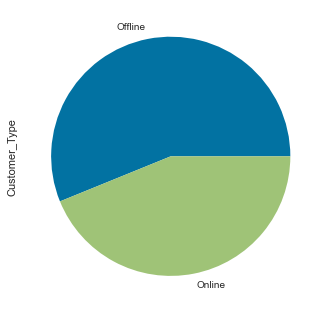

In [404]:
data["Customer_Type"].value_counts().plot.pie()

변수들 사이의 관계 시각화

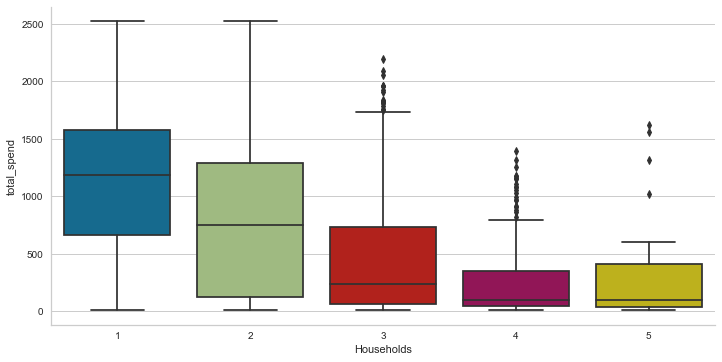

In [405]:
sns.catplot(x="Households",y="total_spend",data=data,kind='box',height=5, aspect=2)

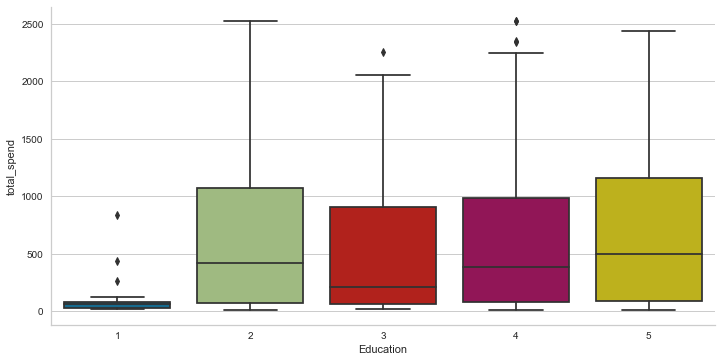

In [406]:
sns.catplot(x="Education",y="total_spend",kind='box',data=data,height=5, aspect=2)

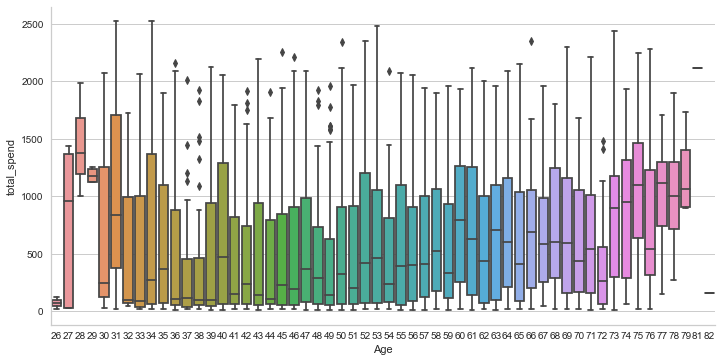

In [407]:
sns.catplot(x="Age",y="total_spend",kind='box',data=data,height=5, aspect=2)

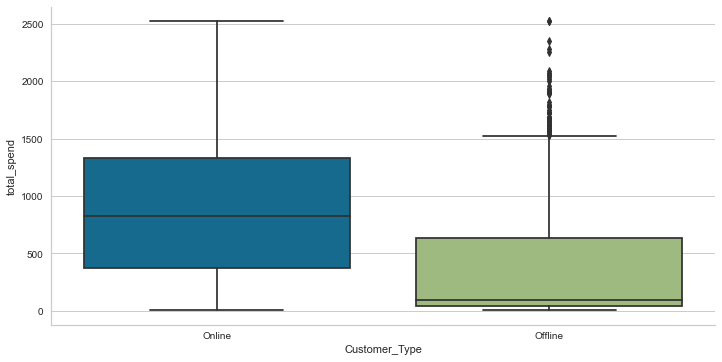

In [408]:
sns.catplot(x="Customer_Type",y="total_spend",kind='box',data=data,height=5, aspect=2)

In [409]:
data.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'Offline_Purchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'total_spend', 'Households',
       'Spending_section', 'days_since_enrollment', 'MntWines_%',
       'MntFruits_%', 'MntMeatProducts_%', 'MntFishProducts_%',
       'MntSweetProducts_%', 'MntGoldProds_%', 'purchase_times',
       'NumDealsPurchases_%', 'NumWebPurchases_%', 'NumCatalogPurchases_%',
       'NumStorePurchases_%', 'Campaign_Success_Degree', 'Online_Purchases',
       'purchase_path_sum', 'Offline_Purchases_percentage',
       'Online_Purchases_percentage', 'Customer_Type'],
      dtype='object')

In [410]:
data.drop(['ID','Dt_Customer','purchase_path_sum',                  # Drop the columns that are combined through the previously
           'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','Response'
           ,'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4'
           ,'AcceptedCmp5'], inplace=True, axis=1)

data.drop(['Marital_Status','Kidhome','Teenhome','Complain',
        'Offline_Purchases_percentage','Online_Purchases_percentage','Marital_Status'
        ], inplace=True, axis=1)

인코딩이랑 스케일링

In [411]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      2235 non-null   int64   
 1   Education                2235 non-null   int32   
 2   Income                   2235 non-null   int32   
 3   Recency                  2235 non-null   int64   
 4   MntWines                 2235 non-null   int64   
 5   MntFruits                2235 non-null   int64   
 6   MntMeatProducts          2235 non-null   int64   
 7   MntFishProducts          2235 non-null   int64   
 8   MntSweetProducts         2235 non-null   int64   
 9   MntGoldProds             2235 non-null   int64   
 10  Offline_Purchases        2235 non-null   int64   
 11  NumWebVisitsMonth        2235 non-null   int64   
 12  total_spend              2235 non-null   int64   
 13  Households               2235 non-null   int64   
 14  Spending

In [412]:
from sklearn import preprocessing # Spending_section , Customer_Type encoder
LE = preprocessing.LabelEncoder()
data['Spending_section']=LE.fit_transform(data['Spending_section'])
data['Customer_Type']=LE.fit_transform(data['Customer_Type'])

In [413]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_copy = data.copy()
col = ['Income','Age','total_spend','purchase_times']
#df_copy[cols] = sc.fit_transform(df_copy[cols])
data_copy[col] = sc.fit_transform(data_copy[col])

In [414]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2235 non-null   float64
 1   Education                2235 non-null   int32  
 2   Income                   2235 non-null   float64
 3   Recency                  2235 non-null   int64  
 4   MntWines                 2235 non-null   int64  
 5   MntFruits                2235 non-null   int64  
 6   MntMeatProducts          2235 non-null   int64  
 7   MntFishProducts          2235 non-null   int64  
 8   MntSweetProducts         2235 non-null   int64  
 9   MntGoldProds             2235 non-null   int64  
 10  Offline_Purchases        2235 non-null   int64  
 11  NumWebVisitsMonth        2235 non-null   int64  
 12  total_spend              2235 non-null   float64
 13  Households               2235 non-null   int64  
 14  Spending_section        

In [415]:
data_copy = data_copy.dropna()

클러스터링

In [416]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [417]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2231 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2231 non-null   float64
 1   Education                2231 non-null   int32  
 2   Income                   2231 non-null   float64
 3   Recency                  2231 non-null   int64  
 4   MntWines                 2231 non-null   int64  
 5   MntFruits                2231 non-null   int64  
 6   MntMeatProducts          2231 non-null   int64  
 7   MntFishProducts          2231 non-null   int64  
 8   MntSweetProducts         2231 non-null   int64  
 9   MntGoldProds             2231 non-null   int64  
 10  Offline_Purchases        2231 non-null   int64  
 11  NumWebVisitsMonth        2231 non-null   int64  
 12  total_spend              2231 non-null   float64
 13  Households               2231 non-null   int64  
 14  Spending_section        

KMeans Clistering will be done in below two methods:

1.Without PCA decomposition and plot by highest correlated features

2. With PCA decomposition and plot by PCA generated features

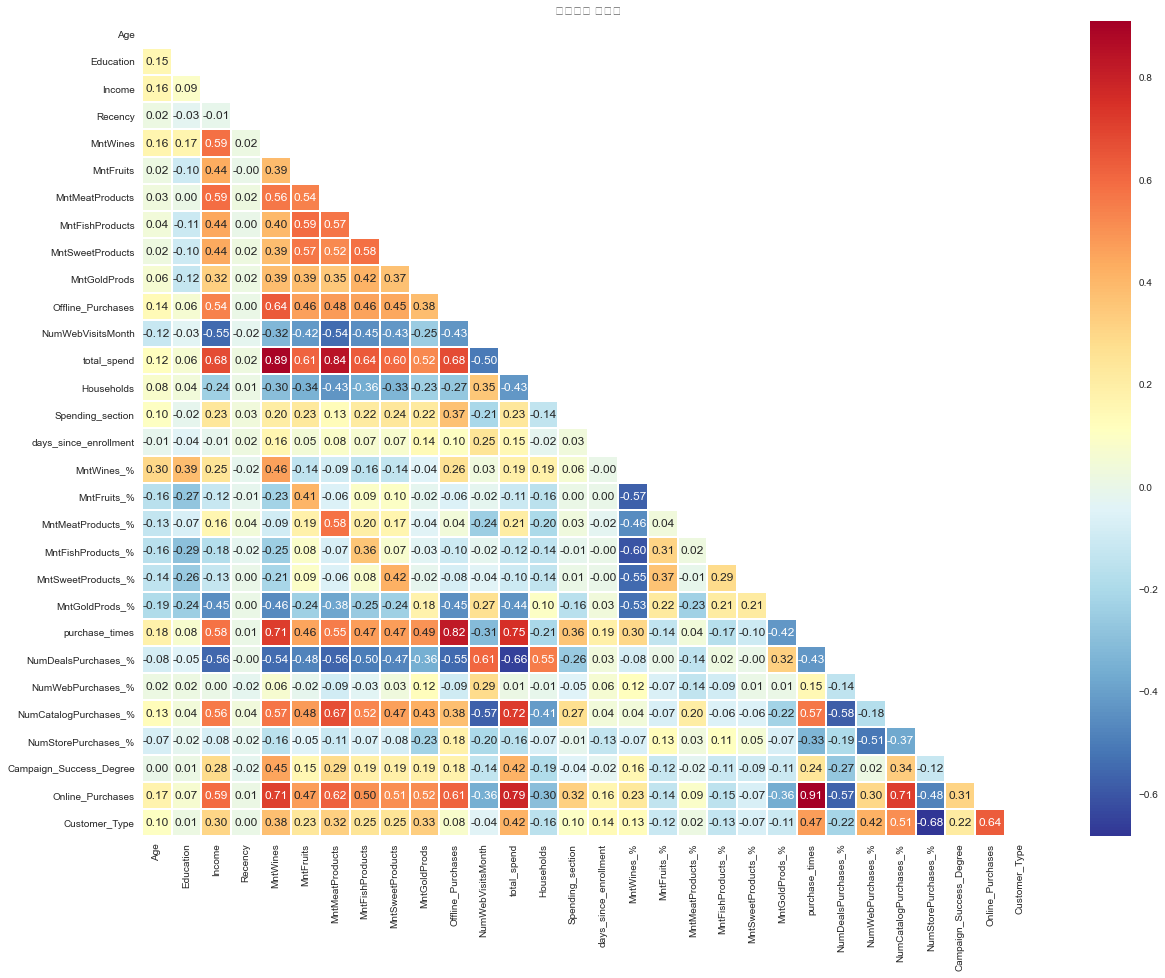

In [418]:
corr = data_copy.corr()   
plt.figure(figsize = (20, 15))
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data = corr,   
            annot = True,  
            mask=mask,   
            fmt = '.2f',   
            linewidths = 1., 
            cmap = 'RdYlBu_r')  
plt.title('상관계수 히트맵')
plt.show()

KMeans clustering without PCA [number of clusters as 3]


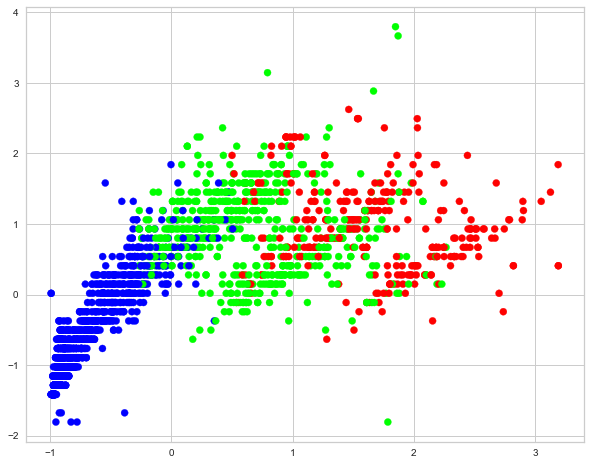

KMeans clustering with PCA [number of clusters as 3]


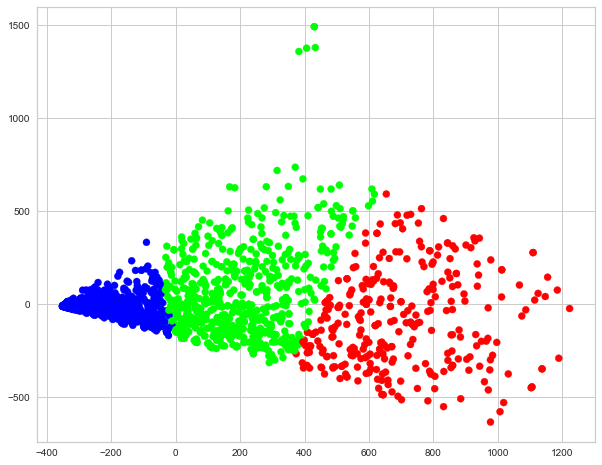

In [419]:
data_nopca = data_copy
data_pca = data_copy


cluster = KMeans(n_clusters = 3).fit_predict(data_nopca)
data_nopca['cluster'] =cluster


pcaDecom = PCA(n_components = 2)
data_pca = pd.DataFrame(data = pcaDecom.fit_transform(data_pca), columns = ['PC_1', 'PC_2'])
cluster_PCA = KMeans(n_clusters = 3).fit_predict(data_pca)
data_pca['cluster_PCA'] = cluster_PCA


print("KMeans clustering without PCA [number of clusters as 3]")

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(data_nopca['total_spend'], data_nopca['purchase_times'], c=data_nopca["cluster"], marker='o',s=50,cmap = 'brg' )
plt.show()

print("KMeans clustering with PCA [number of clusters as 3]")

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(data_pca['PC_1'], data_pca['PC_2'], c=data_pca["cluster_PCA"], marker='o',s=50,cmap = 'brg' )
plt.show()

KMeans clustering without PCA [number of clusters as 4]


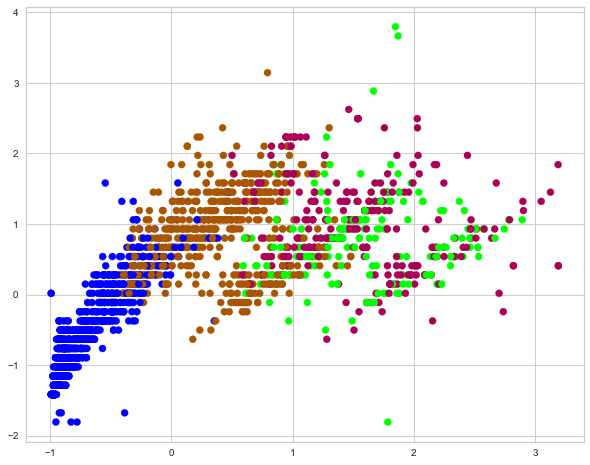

KMeans clustering with PCA [number of clusters as 4]


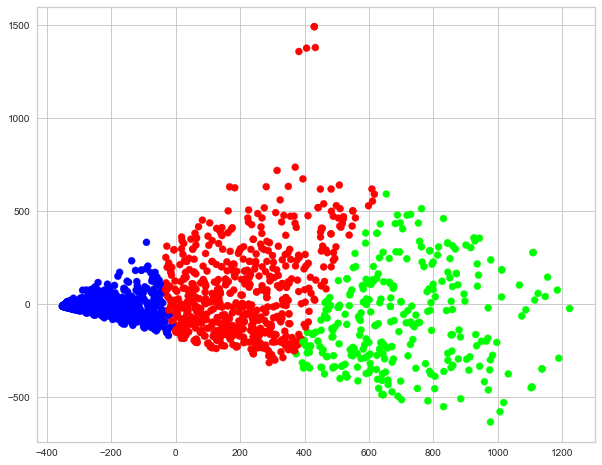

In [420]:
data_nopca = data_copy
data_pca = data_copy


cluster = KMeans(n_clusters = 4).fit_predict(data_nopca)
data_nopca['cluster'] =cluster


pcaDecom = PCA(n_components = 2)
data_pca = pd.DataFrame(data = pcaDecom.fit_transform(data_pca), columns = ['PC_1', 'PC_2'])
cluster_PCA = KMeans(n_clusters = 3).fit_predict(data_pca)
data_pca['cluster_PCA'] = cluster_PCA


print("KMeans clustering without PCA [number of clusters as 4]")

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(data_nopca['total_spend'], data_nopca['purchase_times'], c=data_nopca["cluster"], marker='o',s=50,cmap = 'brg' )
plt.show()

print("KMeans clustering with PCA [number of clusters as 4]")

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(data_pca['PC_1'], data_pca['PC_2'], c=data_pca["cluster_PCA"], marker='o',s=50,cmap = 'brg' )
plt.show()

KMeans clustering without PCA [number of clusters as 5]


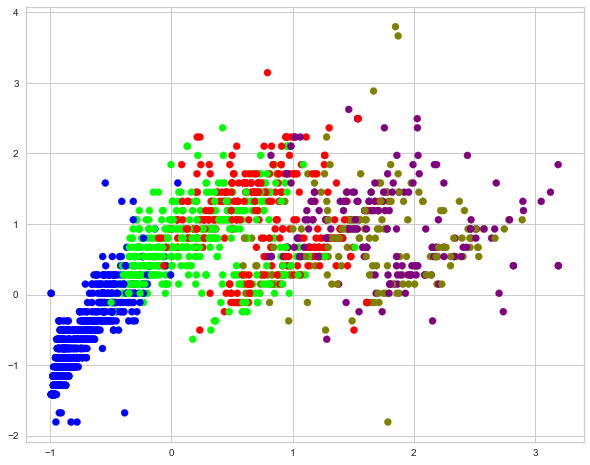

KMeans clustering with PCA [number of clusters as 5]


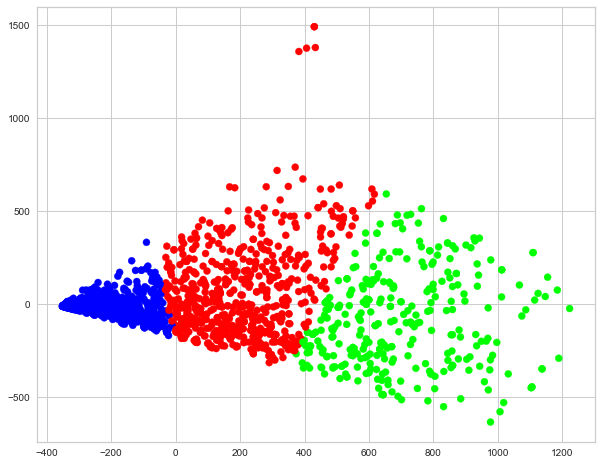

In [421]:
data_nopca = data_copy
data_pca = data_copy


cluster = KMeans(n_clusters = 5).fit_predict(data_nopca)
data_nopca['cluster'] =cluster


pcaDecom = PCA(n_components = 2)
data_pca = pd.DataFrame(data = pcaDecom.fit_transform(data_pca), columns = ['PC_1', 'PC_2'])
cluster_PCA = KMeans(n_clusters = 3).fit_predict(data_pca)
data_pca['cluster_PCA'] = cluster_PCA


print("KMeans clustering without PCA [number of clusters as 5]")

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(data_nopca['total_spend'], data_nopca['purchase_times'], c=data_nopca["cluster"], marker='o',s=50,cmap = 'brg' )
plt.show()

print("KMeans clustering with PCA [number of clusters as 5]")

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.scatter(data_pca['PC_1'], data_pca['PC_2'], c=data_pca["cluster_PCA"], marker='o',s=50,cmap = 'brg' )
plt.show()

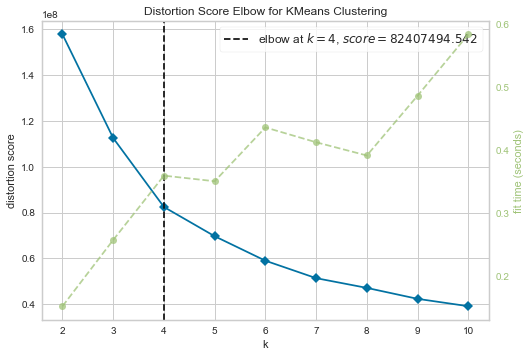

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [422]:
elbow= KElbowVisualizer(KMeans(), k=10)
elbow.fit(data_copy)
elbow.show()

In [423]:
data_kmeanscluster = data_copy

cluster = KMeans(n_clusters = 4).fit_predict(data_kmeanscluster)
data_kmeanscluster['cluster'] =cluster

<AxesSubplot:xlabel='cluster', ylabel='total_spend'>

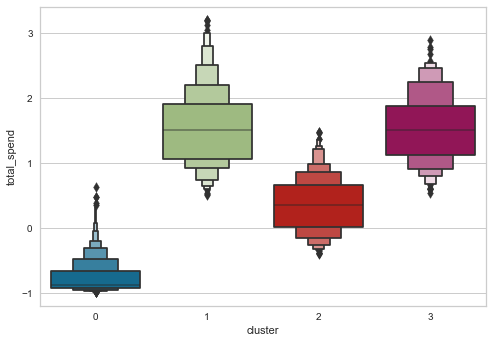

In [424]:
sns.boxenplot(x = 'cluster' , y ='total_spend' ,data = data_kmeanscluster)

<AxesSubplot:xlabel='cluster', ylabel='purchase_times'>

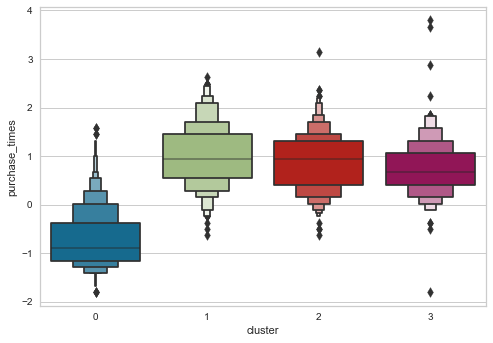

In [425]:
sns.boxenplot(x = 'cluster' , y ='purchase_times' ,data = data_kmeanscluster)

In [426]:
data.columns

Index(['Age', 'Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Offline_Purchases', 'NumWebVisitsMonth', 'total_spend',
       'Households', 'Spending_section', 'days_since_enrollment', 'MntWines_%',
       'MntFruits_%', 'MntMeatProducts_%', 'MntFishProducts_%',
       'MntSweetProducts_%', 'MntGoldProds_%', 'purchase_times',
       'NumDealsPurchases_%', 'NumWebPurchases_%', 'NumCatalogPurchases_%',
       'NumStorePurchases_%', 'Campaign_Success_Degree', 'Online_Purchases',
       'Customer_Type'],
      dtype='object')

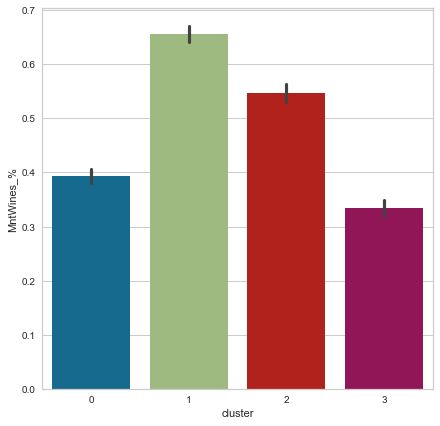

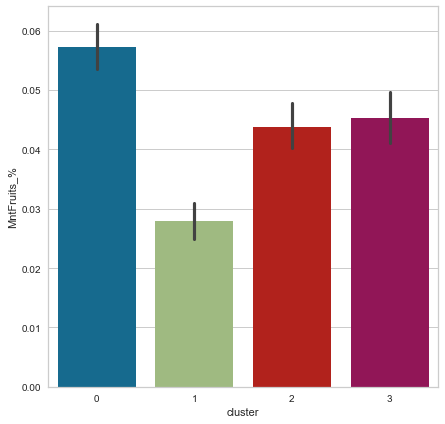

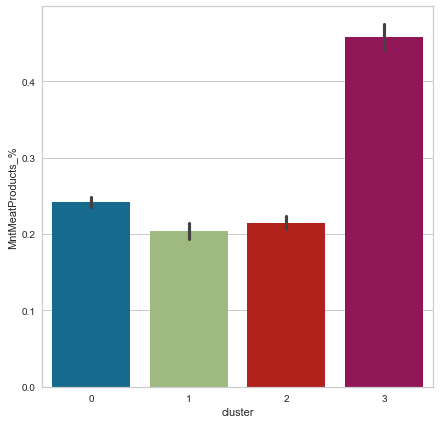

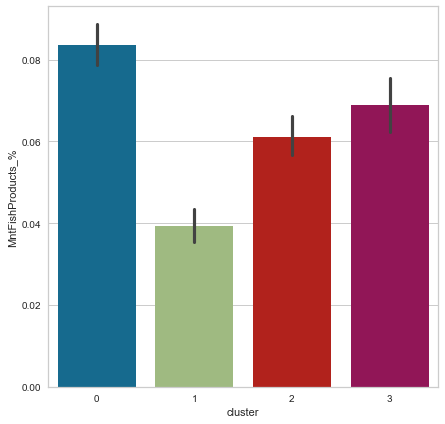

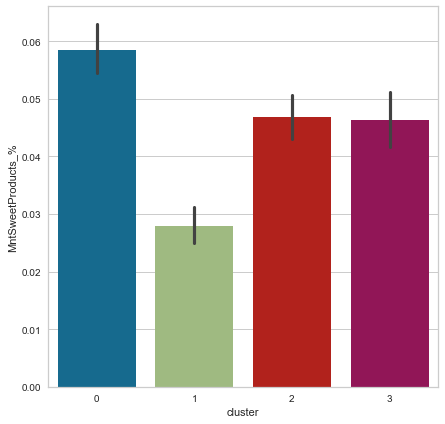

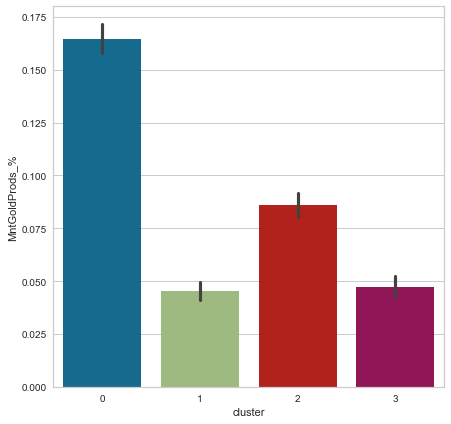

In [427]:
# Spent vs Products
Products = ['MntWines_%',
       'MntFruits_%', 'MntMeatProducts_%', 'MntFishProducts_%', 'MntSweetProducts_%',
       'MntGoldProds_%']

for i in Products:
    plt.figure(figsize = (7,7))
    sns.barplot(x='cluster' , y = i,data = data_kmeanscluster)
    plt.show()

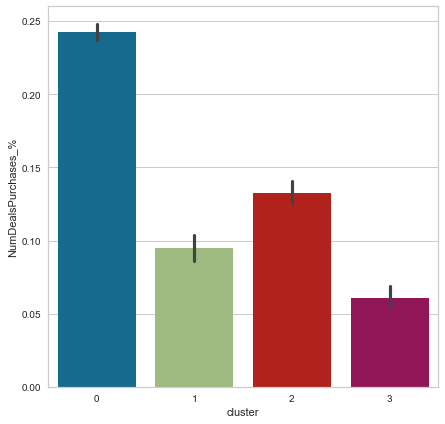

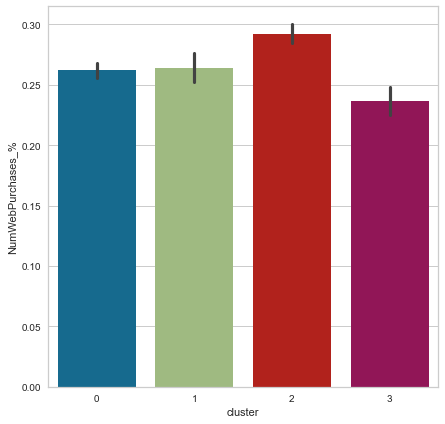

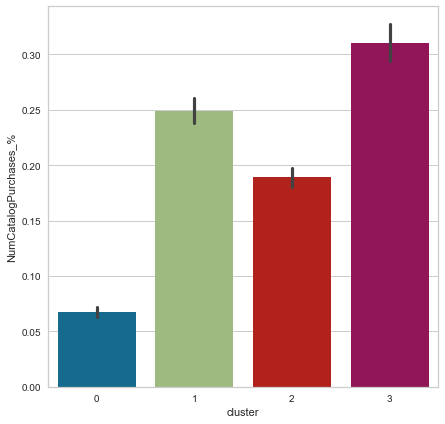

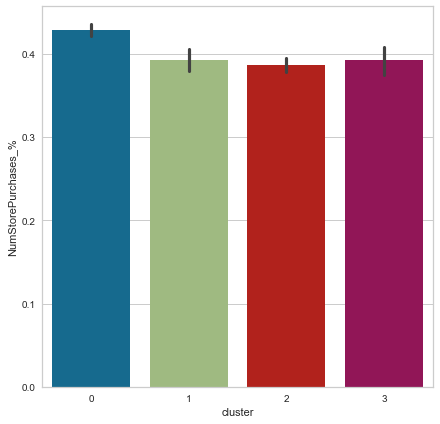

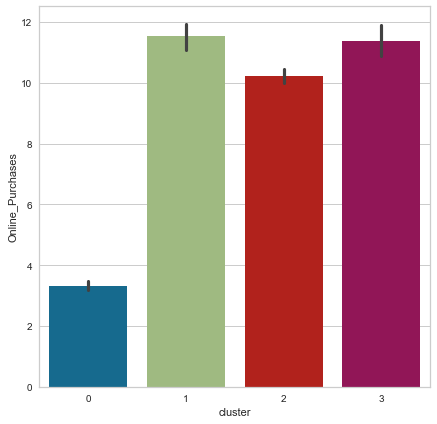

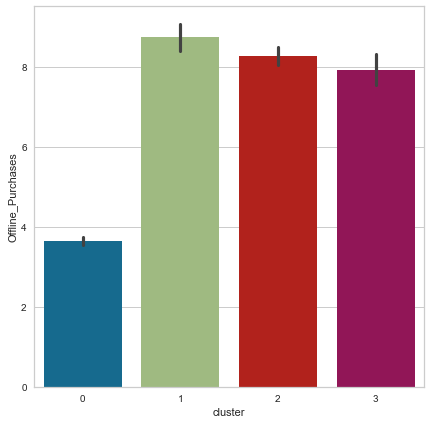

In [428]:
# Spent vs Products
purchase_path = ['NumDealsPurchases_%',
'NumWebPurchases_%',
'NumCatalogPurchases_%',
'NumStorePurchases_%', 'Online_Purchases', 'Offline_Purchases']

for i in purchase_path:
    plt.figure(figsize = (7,7))
    sns.barplot(x  = 'cluster' , y = i,data = data_kmeanscluster)
    plt.show()

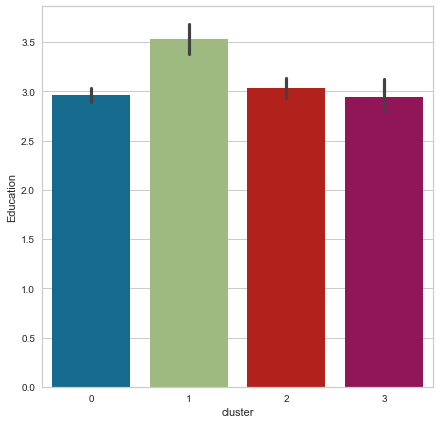

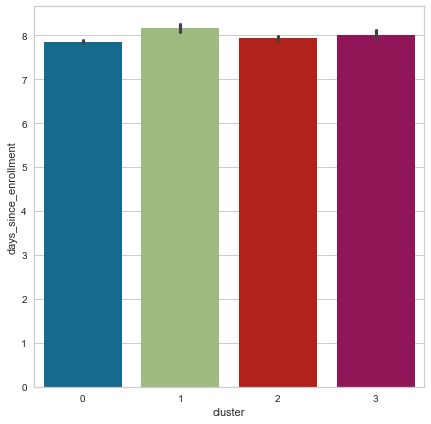

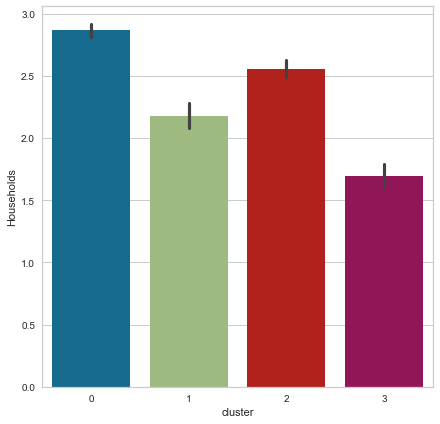

In [429]:
personal_inform = ['Education','days_since_enrollment','Households']

for i in personal_inform:
    plt.figure(figsize = (7,7))
    sns.barplot(x  = 'cluster' , y = i,data = data_kmeanscluster)
    plt.show()

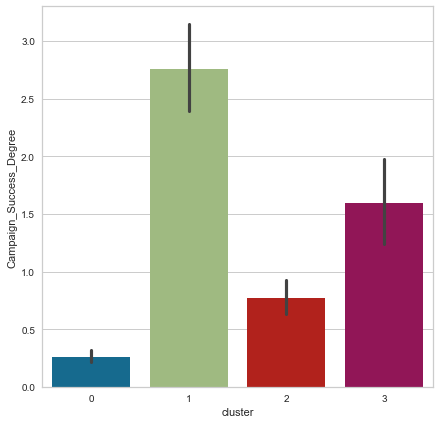

In [430]:
# Spent vs Products
campaign_success = ['Campaign_Success_Degree']

for i in campaign_success:
    plt.figure(figsize = (7,7))
    sns.barplot(x  = 'cluster' , y = i,data = data_kmeanscluster)
    plt.show()

Cluster 0 ->
소비를 적게한다 
구매한 제품 중 생선류제품이 가장 많으며 육류를 적게 소비한다
할인제품에 관해선 클러스터2 다음으로 관심이 많다
온라인구매 오프라인 구매를 둘 다 많이 하며 그 중 가게를 직접 방문해서 구매하는 비율이 높다
가구수가 약 2.5명이며 교육수준은 두 번째로 높다.
캠페인에 관한 반응이 매우 낮다 
>>브론즈 고객 (모든 품목에 대해서 할인 제품을 홍보해야한다)

Cluster 1 ->
소비를 많이 한다
구매한 제품 중 육류제품구매율이 가장 많으며, 금에 대해선 관심이 없다
할인에 관해서 가장 관심이 없으며
주 구매경로는 카탈로그가 가장 많으며, 온라인에서 가장 많이 구매한다.
가구수는 1.5명으로 가장 낮다
캠페인에 대한 반응도가 두 번째로 높지만 우수하지는 않다
>> 골드 고객 (온라인, 특히 카탈로그를 통한 금 제품 홍보가 필요하고 1인용 육류제품을 판매하는 마케팅 전략이 필요하다)

Cluster 2 ->

소비를 가장 적게한다
구매한 제품 중 육류소비가 적다
할인제품에 관해 가장 관심이 많다
주 구매경로는 오프라인이다
가구수가 가장 많으며, 캠페인 참여율이 가장 낮다
>> 실버 고객 (오프라인을 통한 육류 할인을 홍보하고, 많은 가구 수를 고려한 제품을 출시해야한다.)

Cluster 3 ->

가장 소비가 많다
구매제품 중 와인이 대부분이며 나머지 제품은 구매하는 횟수가 적다
할인제품에 관해선 관심이 가장 적고
온라인과 오프라인 둘 다 구매를 많이한다
교육수준이 가장 높고, 가구 수는 2.3명정도로 평균이다
캠페인 참여율이 가장 높다
>> 플레티넘 고객 (와인에 관한 캠페인을 홍보하며, 나머지 제품을 구매시키기 위한 캠페인 참여율을 높여야한다.)


# Apriori Algorithm

In [431]:
!pip install mlxtend

In [432]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax
from mlxtend.preprocessing import TransactionEncoder

In [433]:
data = data.rename(columns = {
    'MntWines': "Wine",
    'MntFruits': 'Fruit',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
})

In [434]:
#For association analysis, new data were composed with goods. 
data_goods = data[[ "Wine","Fruit", "Meat", "Fish","Sweets", "Gold" ]]
data_goods. head()

,Wine,Fruit,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [435]:
# Each product was divided into two sections. 
cut_labels = ['Low consumer', 'Biggest consumer']
data_goods['Wine_segment'] = pd.qcut(data_goods['Wine'],q= 2, labels=cut_labels).astype("object")
data_goods['Fruit_segment'] = pd.qcut(data_goods['Fruit'],q= 2, labels=cut_labels).astype("object")
data_goods['Meat_segment'] = pd.qcut(data_goods['Meat'],q= 2, labels=cut_labels).astype("object")
data_goods['Fish_segment'] = pd.qcut(data_goods['Fish'],q= 2, labels=cut_labels).astype("object")
data_goods['Sweets_segment'] = pd.qcut(data_goods['Sweets'],q= 2, labels=cut_labels).astype("object")
data_goods['Gold_segment'] = pd.qcut(data_goods['Gold'],q= 2, labels=cut_labels).astype("object")
data_goods.replace(np.nan, "Non consumer",inplace=True)
data_goods.drop(columns=['Wine','Fruit','Meat','Fish','Sweets','Gold'],inplace=True)
data_goods = data_goods.astype(object)

In [436]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format
association=data_goods.copy() 
df = pd.get_dummies(association)

In [437]:
 df.head()

,Wine_segment_Biggest consumer,Wine_segment_Low consumer,Fruit_segment_Biggest consumer,Fruit_segment_Low consumer,Meat_segment_Biggest consumer,Meat_segment_Low consumer,Fish_segment_Biggest consumer,Fish_segment_Low consumer,Sweets_segment_Biggest consumer,Sweets_segment_Low consumer,Gold_segment_Biggest consumer,Gold_segment_Low consumer
0,1,0,1,0,1,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0,1,0,1,0,1
2,1,0,1,0,1,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0,1,0,1,0,1
4,0,1,1,0,1,0,1,0,1,0,0,1


In [438]:
#Minimum support was set. 
min_support = 0.1
max_len = 10

frequent_itemsets = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)

In [439]:
frequent_itemsets.shape

(142, 2)

In [440]:
#Those who bought a lot of wine have the highest support of 0.5.
frequent_itemsets.head()

,support,itemsets
0,0.500,(Wine_segment_Biggest consumer)
1,0.500,(Wine_segment_Low consumer)
2,0.489,(Fruit_segment_Biggest consumer)
3,0.511,(Fruit_segment_Low consumer)
4,0.499,(Meat_segment_Biggest consumer)


In [441]:
#Frequent itemsets with "confidence" as the metrics with the minimum threshold = 0.7
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

In [442]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [443]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Wine_segment_Biggest consumer),(Fruit_segment_Biggest consumer),0.500,0.489,0.370,0.741,1.516,0.126,1.975
1,(Fruit_segment_Biggest consumer),(Wine_segment_Biggest consumer),0.489,0.500,0.370,0.758,1.516,0.126,2.063
2,(Wine_segment_Biggest consumer),(Meat_segment_Biggest consumer),0.500,0.499,0.430,0.861,1.726,0.181,3.611
3,(Meat_segment_Biggest consumer),(Wine_segment_Biggest consumer),0.499,0.500,0.430,0.863,1.726,0.181,3.645
4,(Wine_segment_Biggest consumer),(Fish_segment_Biggest consumer),0.500,0.489,0.372,0.744,1.520,0.127,1.994


In [444]:
rules.sort_values(['support'], axis=0, ascending=False, inplace=True)

In [445]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Meat_segment_Low consumer),(Wine_segment_Low consumer),0.501,0.500,0.432,0.862,1.722,0.181,3.611
13,(Wine_segment_Low consumer),(Meat_segment_Low consumer),0.500,0.501,0.432,0.863,1.722,0.181,3.645
2,(Wine_segment_Biggest consumer),(Meat_segment_Biggest consumer),0.500,0.499,0.430,0.861,1.726,0.181,3.611
3,(Meat_segment_Biggest consumer),(Wine_segment_Biggest consumer),0.499,0.500,0.430,0.863,1.726,0.181,3.645
30,(Fruit_segment_Low consumer),(Fish_segment_Low consumer),0.511,0.511,0.423,0.827,1.621,0.162,2.838


In [446]:
print('total generated rules:', rules.shape)

total generated rules: (853, 9)


In [447]:
# To get Top rules using the metric 'support'
rules.nlargest(10,['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Meat_segment_Low consumer),(Wine_segment_Low consumer),0.501,0.500,0.432,0.862,1.722,0.181,3.611
13,(Wine_segment_Low consumer),(Meat_segment_Low consumer),0.500,0.501,0.432,0.863,1.722,0.181,3.645
2,(Wine_segment_Biggest consumer),(Meat_segment_Biggest consumer),0.500,0.499,0.430,0.861,1.726,0.181,3.611
3,(Meat_segment_Biggest consumer),(Wine_segment_Biggest consumer),0.499,0.500,0.430,0.863,1.726,0.181,3.645
30,(Fruit_segment_Low consumer),(Fish_segment_Low consumer),0.511,0.511,0.423,0.827,1.621,0.162,2.838
31,(Fish_segment_Low consumer),(Fruit_segment_Low consumer),0.511,0.511,0.423,0.828,1.621,0.162,2.847
43,(Fish_segment_Low consumer),(Meat_segment_Low consumer),0.511,0.501,0.421,0.826,1.647,0.166,2.860
42,(Meat_segment_Low consumer),(Fish_segment_Low consumer),0.501,0.511,0.421,0.841,1.647,0.166,3.080
32,(Fruit_segment_Low consumer),(Sweets_segment_Low consumer),0.511,0.506,0.419,0.820,1.623,0.161,2.754
33,(Sweets_segment_Low consumer),(Fruit_segment_Low consumer),0.506,0.511,0.419,0.829,1.623,0.161,2.863


In [448]:
#Wine purchase has a great influence on Meat purchase. (support = 0.43)
rules[rules['antecedents'] == {'Wine_segment_Biggest consumer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Wine_segment_Biggest consumer),(Meat_segment_Biggest consumer),0.500,0.499,0.430,0.861,1.726,0.181,3.611
8,(Wine_segment_Biggest consumer),(Gold_segment_Biggest consumer),0.500,0.498,0.376,0.752,1.511,0.127,2.026
4,(Wine_segment_Biggest consumer),(Fish_segment_Biggest consumer),0.500,0.489,0.372,0.744,1.520,0.127,1.994
6,(Wine_segment_Biggest consumer),(Sweets_segment_Biggest consumer),0.500,0.494,0.371,0.742,1.501,0.124,1.961
0,(Wine_segment_Biggest consumer),(Fruit_segment_Biggest consumer),0.500,0.489,0.370,0.741,1.516,0.126,1.975
78,(Wine_segment_Biggest consumer),"(Meat_segment_Biggest consumer, Fish_segment_Biggest consumer)",0.500,0.410,0.360,0.720,1.756,0.155,2.106
84,(Wine_segment_Biggest consumer),"(Meat_segment_Biggest consumer, Sweets_segment_Biggest consumer)",0.500,0.407,0.359,0.719,1.768,0.156,2.111
63,(Wine_segment_Biggest consumer),"(Meat_segment_Biggest consumer, Fruit_segment_Biggest consumer)",0.500,0.407,0.358,0.717,1.763,0.155,2.097


In [449]:
rules[(rules['support'] >= 0.4) & 
      (rules['confidence'] >= 0.7)&
      (rules['lift'] >=1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Meat_segment_Low consumer),(Wine_segment_Low consumer),0.501,0.500,0.432,0.862,1.722,0.181,3.611
13,(Wine_segment_Low consumer),(Meat_segment_Low consumer),0.500,0.501,0.432,0.863,1.722,0.181,3.645
2,(Wine_segment_Biggest consumer),(Meat_segment_Biggest consumer),0.500,0.499,0.430,0.861,1.726,0.181,3.611
3,(Meat_segment_Biggest consumer),(Wine_segment_Biggest consumer),0.499,0.500,0.430,0.863,1.726,0.181,3.645
30,(Fruit_segment_Low consumer),(Fish_segment_Low consumer),0.511,0.511,0.423,0.827,1.621,0.162,2.838
31,(Fish_segment_Low consumer),(Fruit_segment_Low consumer),0.511,0.511,0.423,0.828,1.621,0.162,2.847
43,(Fish_segment_Low consumer),(Meat_segment_Low consumer),0.511,0.501,0.421,0.826,1.647,0.166,2.860
42,(Meat_segment_Low consumer),(Fish_segment_Low consumer),0.501,0.511,0.421,0.841,1.647,0.166,3.080
32,(Fruit_segment_Low consumer),(Sweets_segment_Low consumer),0.511,0.506,0.419,0.820,1.623,0.161,2.754
33,(Sweets_segment_Low consumer),(Fruit_segment_Low consumer),0.506,0.511,0.419,0.829,1.623,0.161,2.863


In [450]:
#seeing the number of items in one frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.500,(Wine_segment_Biggest consumer),1
1,0.500,(Wine_segment_Low consumer),1
2,0.489,(Fruit_segment_Biggest consumer),1
3,0.511,(Fruit_segment_Low consumer),1
4,0.499,(Meat_segment_Biggest consumer),1
5,0.501,(Meat_segment_Low consumer),1
6,0.489,(Fish_segment_Biggest consumer),1
7,0.511,(Fish_segment_Low consumer),1
8,0.494,(Sweets_segment_Biggest consumer),1
9,0.506,(Sweets_segment_Low consumer),1


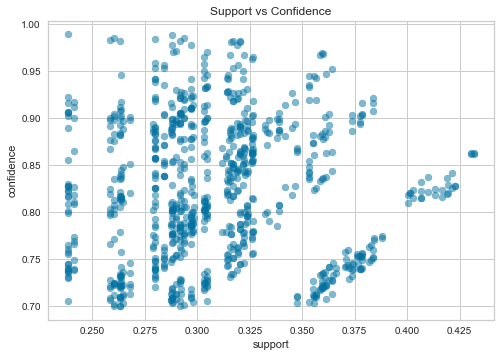

In [451]:
#Plot the metrics between Support and Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

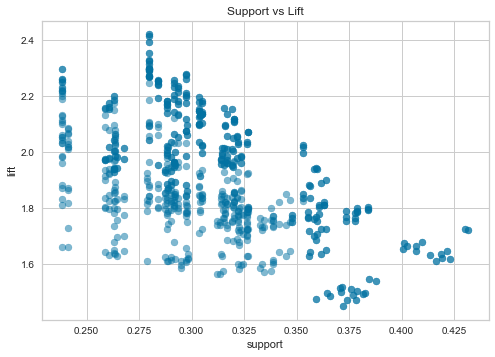

In [452]:
#compare between Support and lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

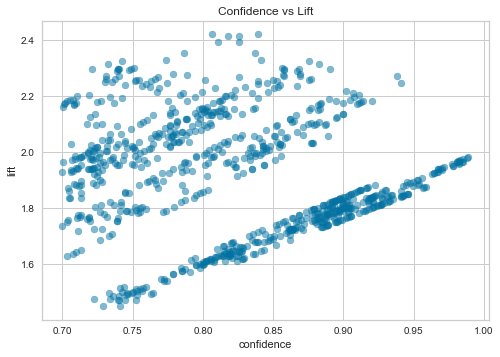

In [453]:
#compare between Confidence and Lift
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

# 분류나무분석

In [454]:
from sklearn.model_selection import cross_val_predict, KFold, cross_val_score, LeaveOneOut
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [455]:
data.head()

,Age,Education,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,Offline_Purchases,NumWebVisitsMonth,total_spend,Households,Spending_section,days_since_enrollment,MntWines_%,MntFruits_%,MntMeatProducts_%,MntFishProducts_%,MntSweetProducts_%,MntGoldProds_%,purchase_times,NumDealsPurchases_%,NumWebPurchases_%,NumCatalogPurchases_%,NumStorePurchases_%,Campaign_Success_Degree,Online_Purchases,Customer_Type
0,65,2,58138,58,635,88,546,172,88,88,4,7,1617,1,2,9,0.393,0.054,0.338,0.106,0.054,0.054,25,0.120,0.320,0.400,0.160,0,18,1
1,68,2,46344,38,11,1,6,2,1,6,2,5,27,3,1,7,0.407,0.037,0.222,0.074,0.037,0.222,6,0.333,0.167,0.167,0.333,0,2,0
2,57,2,71613,26,426,49,127,111,21,42,10,4,776,2,1,8,0.549,0.063,0.164,0.143,0.027,0.054,21,0.048,0.381,0.095,0.476,0,10,0
3,38,2,26646,26,11,4,20,10,3,5,4,6,53,3,1,7,0.208,0.075,0.377,0.189,0.057,0.094,8,0.250,0.250,0.000,0.500,0,2,0
4,41,5,58293,94,173,43,118,46,27,15,6,5,422,3,1,7,0.410,0.102,0.280,0.109,0.064,0.036,19,0.263,0.263,0.158,0.316,0,8,1


In [456]:
data.columns

Index(['Age', 'Education', 'Income', 'Recency', 'Wine', 'Fruit', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Offline_Purchases', 'NumWebVisitsMonth',
       'total_spend', 'Households', 'Spending_section',
       'days_since_enrollment', 'MntWines_%', 'MntFruits_%',
       'MntMeatProducts_%', 'MntFishProducts_%', 'MntSweetProducts_%',
       'MntGoldProds_%', 'purchase_times', 'NumDealsPurchases_%',
       'NumWebPurchases_%', 'NumCatalogPurchases_%', 'NumStorePurchases_%',
       'Campaign_Success_Degree', 'Online_Purchases', 'Customer_Type'],
      dtype='object')

In [457]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import tree


target1 = ['Customer_Type']
features1 = [ 'Income', 'total_spend', 'purchase_times','Households','Education', 'Age']


x_train1, x_test1, y_train1, y_test1 = train_test_split(data[features1],data[target1], test_size= 0.3,random_state=1)

In [458]:
data.isnull().sum()

Age                        0
Education                  0
Income                     0
Recency                    0
Wine                       0
Fruit                      0
Meat                       0
Fish                       0
Sweets                     0
Gold                       0
Offline_Purchases          0
NumWebVisitsMonth          0
total_spend                0
Households                 0
Spending_section           0
days_since_enrollment      0
MntWines_%                 0
MntFruits_%                0
MntMeatProducts_%          0
MntFishProducts_%          0
MntSweetProducts_%         0
MntGoldProds_%             0
purchase_times             0
NumDealsPurchases_%        4
NumWebPurchases_%          4
NumCatalogPurchases_%      4
NumStorePurchases_%        4
Campaign_Success_Degree    0
Online_Purchases           0
Customer_Type              0
dtype: int64

In [459]:
data = data.dropna()

In [460]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(x_train1, y_train1)
y_pred1 = treeclf.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.706408345752608


In [461]:
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(x_train1, y_train1)
y_pred1 = treeclf.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7093889716840537


In [462]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(x_train1, y_train1)
y_pred1 = treeclf.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7049180327868853


In [463]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [464]:
from sklearn import tree
text_representation = tree.export_text(treeclf)
print(text_representation)

|--- feature_1 <= 174.50
|   |--- feature_1 <= 67.50
|   |   |--- feature_2 <= 3.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  3.00
|   |   |   |--- feature_2 <= 10.50
|   |   |   |   |--- feature_2 <= 9.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  9.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  10.50
|   |   |   |   |--- feature_4 <= 3.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  3.00
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  67.50
|   |   |--- feature_0 <= 16405.50
|   |   |   |--- feature_0 <= 7167.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7167.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  16405.50
|   |   |   |--- feature_0 <= 22658.00
|   |   |   |   |--- feature_2 <= 9.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  9.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  22658.00
|   |   |   |   |--- feature_5 <= 72.

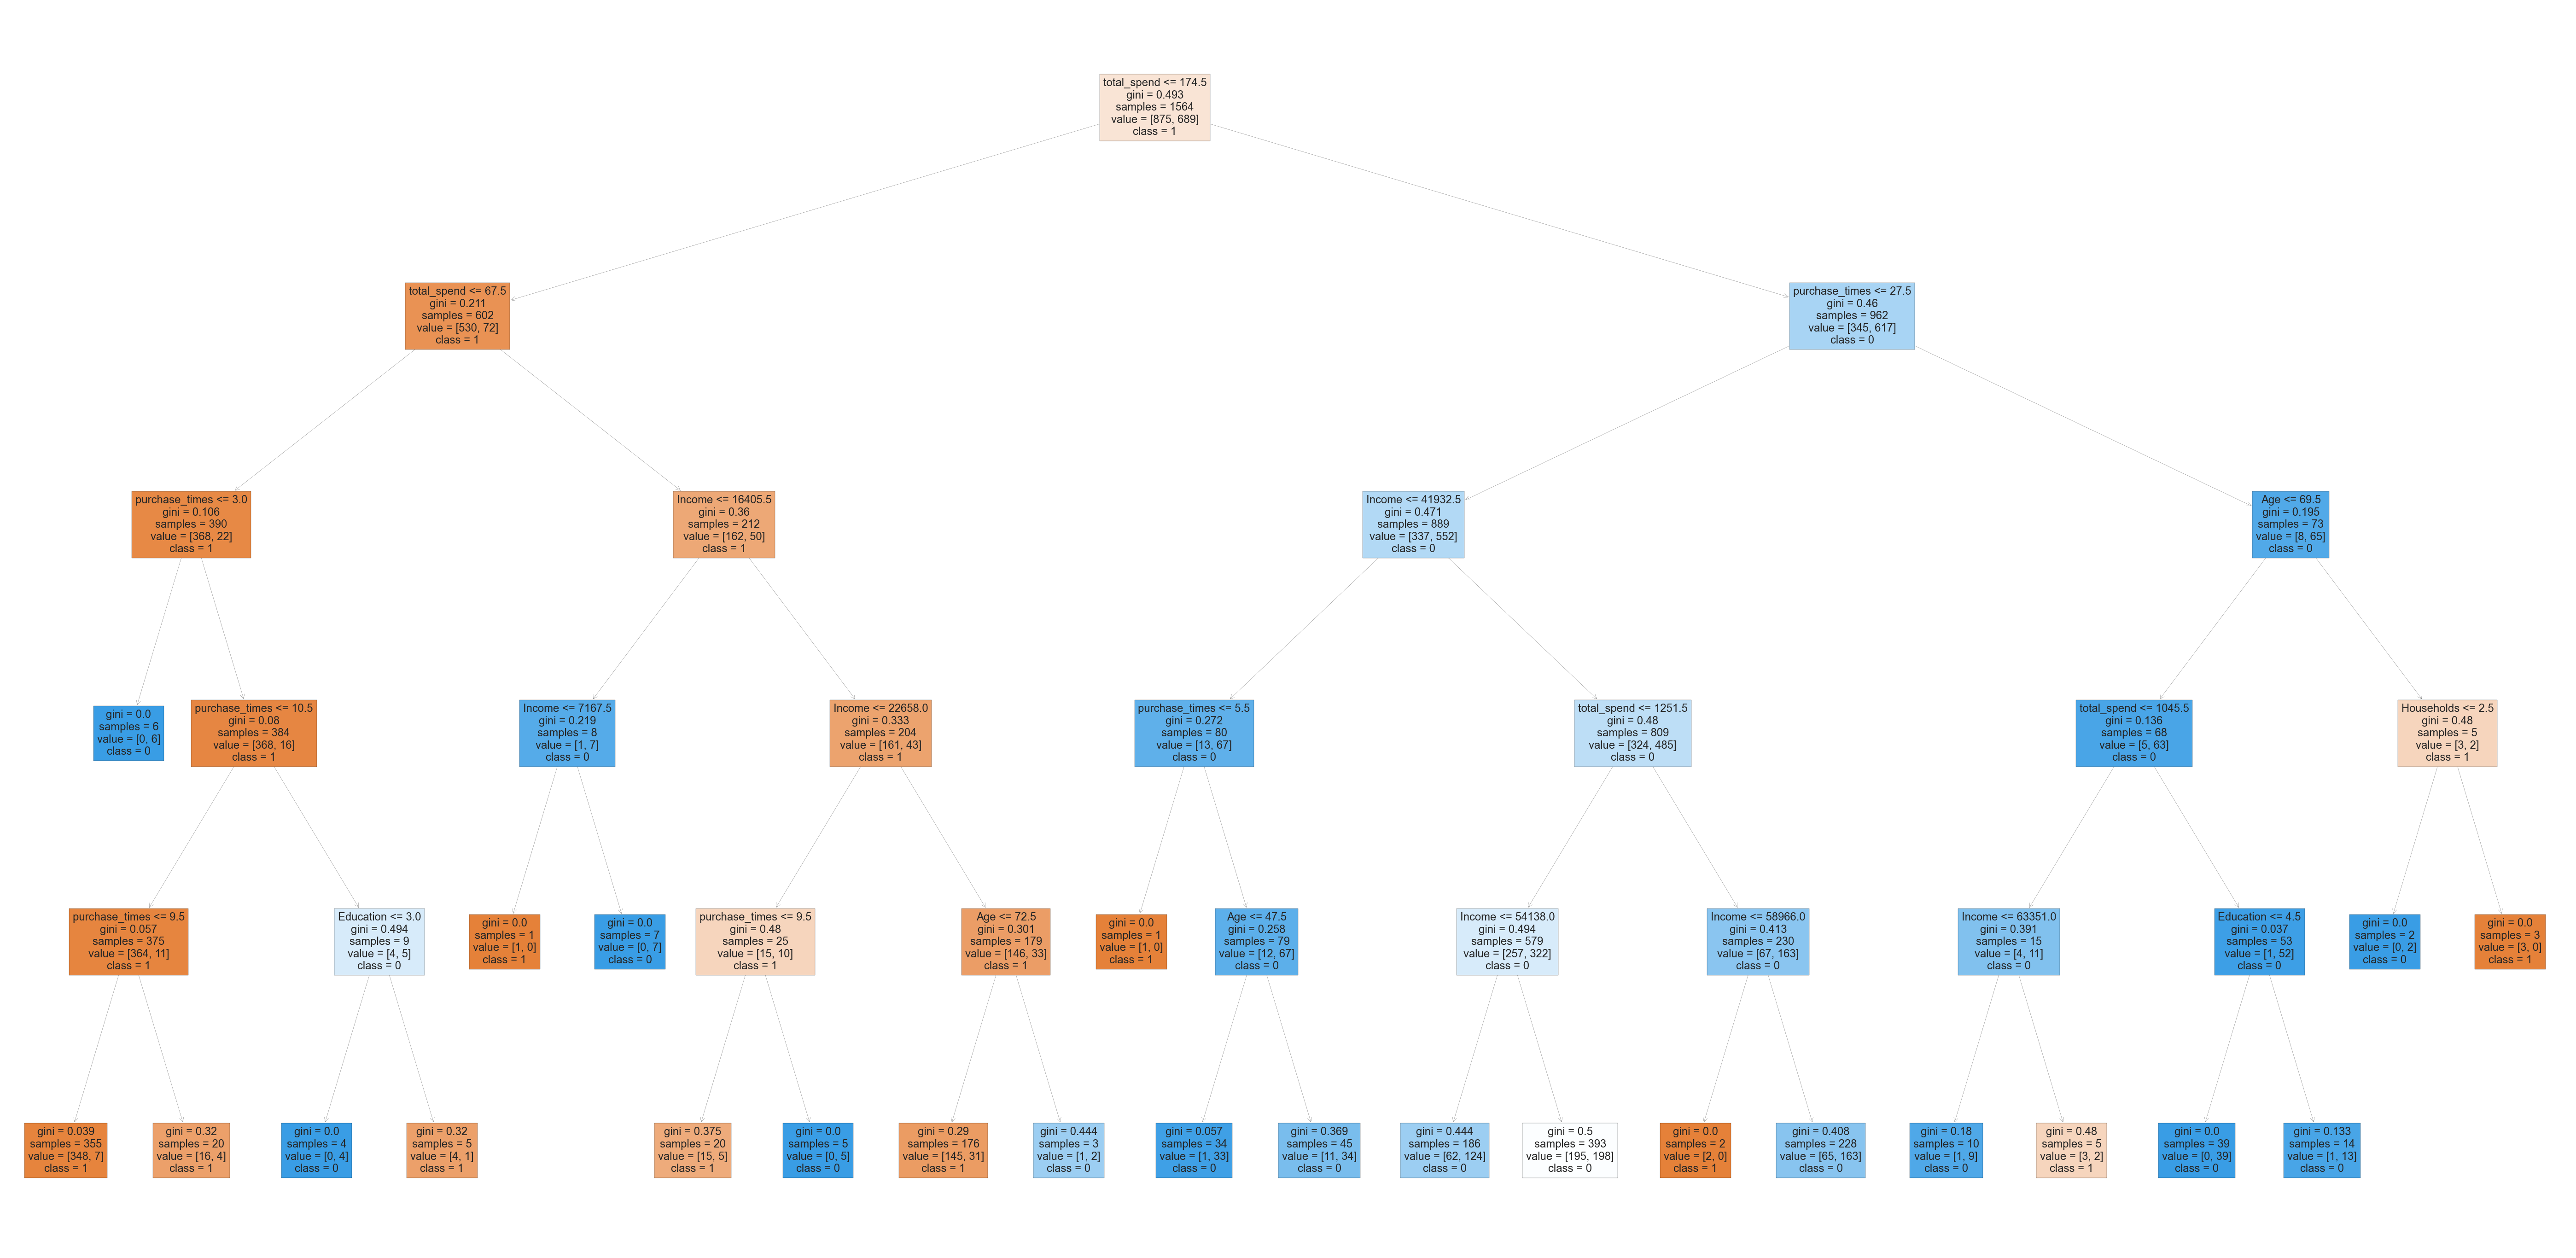

In [465]:
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(treeclf, 
                   feature_names=features1,  
                   class_names=data_copy.Customer_Type.astype(str),
                   filled=True)

In [466]:
pd.DataFrame({'feature':features1, 'importance':treeclf.feature_importances_})

,feature,importance
0,Income,0.100
1,total_spend,0.750
2,purchase_times,0.112
3,Households,0.008
4,Education,0.010
5,Age,0.020


In [467]:
conf_matrix = confusion_matrix(y_test1, y_pred1)
print(conf_matrix)

[[216 164]
 [ 34 257]]


In [468]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69       380
           1       0.61      0.88      0.72       291

    accuracy                           0.70       671
   macro avg       0.74      0.73      0.70       671
weighted avg       0.75      0.70      0.70       671



In [469]:
data.columns

Index(['Age', 'Education', 'Income', 'Recency', 'Wine', 'Fruit', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Offline_Purchases', 'NumWebVisitsMonth',
       'total_spend', 'Households', 'Spending_section',
       'days_since_enrollment', 'MntWines_%', 'MntFruits_%',
       'MntMeatProducts_%', 'MntFishProducts_%', 'MntSweetProducts_%',
       'MntGoldProds_%', 'purchase_times', 'NumDealsPurchases_%',
       'NumWebPurchases_%', 'NumCatalogPurchases_%', 'NumStorePurchases_%',
       'Campaign_Success_Degree', 'Online_Purchases', 'Customer_Type'],
      dtype='object')

# 회귀나무 예측

신규고객(데이터가 없는 소비자)들의 개인 정보(feature_cols)를 가지고 기존고객의 개인정보 데이터를 학습시켜
신규고객의 Purchase times 구매횟수 즉 얼마나 구매할 것인지 회귀나무로 예측
하지만 회귀나무에서는 연속형 변수를 비연속적인 값으로 취급하기 때문에 분리할때(왼쪽 오른쪽으로 나뉠때 경계점 부근에서는 오류가 나올 수 있다는 한계점이 있음. 따라서 다중회귀분석으로 신규고객구매횟수를 한번 더 예측해볼 것임

In [470]:
# PPT 제작시 얘네로 신규고객 설문지 하나 만들어주세요~ 'Age', 'Education', 'Income','NumWebVisitsMonth','Recency','total_spend', 'Households','Customer_Type'
x2 = pd.DataFrame(data, columns=['Age', 'Education', 'Income','NumWebVisitsMonth','Recency','total_spend', 'Households','Customer_Type'])
y2 = data.purchase_times
feature_cols=['Age', 'Education', 'Income','NumWebVisitsMonth','Recency','total_spend', 'Households','Customer_Type']

In [471]:
#기존고객 기본정보 데이터를 test data 80으로 split해서 예측해볼것임
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size=0.8, test_size=0.2) 

In [472]:
print(x_train2)
print(y_train2)
print(x_test2)
print(y_test2)

      Age  Education  Income  NumWebVisitsMonth  Recency  total_spend  \
2030   75          5   68117                  6       80          930   
1317   49          3   46094                  7       62           44   
651    37          2   29103                  9       38           48   
1914   59          5   52278                  8       24         1198   
1666   55          5   63246                  4       60          772   
450    67          2   57959                  3       71          868   
306    56          2   27038                  9       64          107   
1920   45          3   31878                  3        7           70   
231    60          3   81975                  7        2         1588   
1112   49          5   54466                  5       78           16   
60     40          4   75777                  1       12         1438   
1795   62          4   28520                  6       55           43   
1314   33          3   59060                  4    

In [473]:
#회귀나무 만들어줌
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(x_train2, y_train2)

DecisionTreeRegressor(random_state=1)

In [474]:
#test data2로 예측한 값을 pred2 라고 하자
pred2 = treereg.predict(x_test2)

In [475]:
#MSE 11.09
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test2, pred2)) 

3.6801663224742747

In [476]:
# 위의 MSE 양호하나 cross_validation으로 깊이를 임의로 2,3,4 로 둬보면서 MSE가 가장 적게 나오는 깊이를 선택할것임
from sklearn.model_selection import cross_val_score

In [477]:
#cross_validation 안했을떄 MSE보다 에러가 훨씬 적음
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, x2, y2,  scoring='neg_mean_squared_error')  
np.mean(np.sqrt(-scores))

3.5775073370708688

In [478]:
# try max_depth=3
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
scores = cross_val_score(treereg, x2, y2, scoring='neg_mean_squared_error') 
np.mean(np.sqrt(-scores))

3.303627510785416

In [479]:
# try max_depth=4, 깊이 4로 설정 시 최소제곱합이 매우 양호함 따라서 깊이 4로 두고 회귀나무 적합 후 분석할 것임
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, x2, y2, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3.2497051195731275

In [480]:
#깊이 4로 설정해서 모델 만들어줌
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
treereg.fit(x_train2, y_train2)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [481]:
#회귀나무 score 매우 양호함
print(treereg.score(x_train2,y_train2))
print(treereg.score(x_test2,y_test2))

0.8350245435888705
0.8333358398303217


In [482]:
#total_spend가 가장 영향있음 의사결정나무 root에 올 것임
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,Age,0.002
1,Education,0.000
2,Income,0.010
3,NumWebVisitsMonth,0.019
4,Recency,0.000
5,total_spend,0.968
6,Households,0.001
7,Customer_Type,0.000


In [483]:
from sklearn import tree
text_representation = tree.export_text(treereg)
print(text_representation)

|--- feature_5 <= 268.50
|   |--- feature_5 <= 145.50
|   |   |--- feature_5 <= 43.50
|   |   |   |--- feature_3 <= 14.00
|   |   |   |   |--- value: [5.08]
|   |   |   |--- feature_3 >  14.00
|   |   |   |   |--- value: [15.00]
|   |   |--- feature_5 >  43.50
|   |   |   |--- feature_5 <= 60.50
|   |   |   |   |--- value: [6.84]
|   |   |   |--- feature_5 >  60.50
|   |   |   |   |--- value: [8.13]
|   |--- feature_5 >  145.50
|   |   |--- feature_5 <= 210.50
|   |   |   |--- feature_0 <= 31.50
|   |   |   |   |--- value: [16.00]
|   |   |   |--- feature_0 >  31.50
|   |   |   |   |--- value: [10.71]
|   |   |--- feature_5 >  210.50
|   |   |   |--- feature_6 <= 3.50
|   |   |   |   |--- value: [12.41]
|   |   |   |--- feature_6 >  3.50
|   |   |   |   |--- value: [15.26]
|--- feature_5 >  268.50
|   |--- feature_5 <= 492.50
|   |   |--- feature_5 <= 399.00
|   |   |   |--- feature_0 <= 76.50
|   |   |   |   |--- value: [15.13]
|   |   |   |--- feature_0 >  76.50
|   |   |   |   |--- 

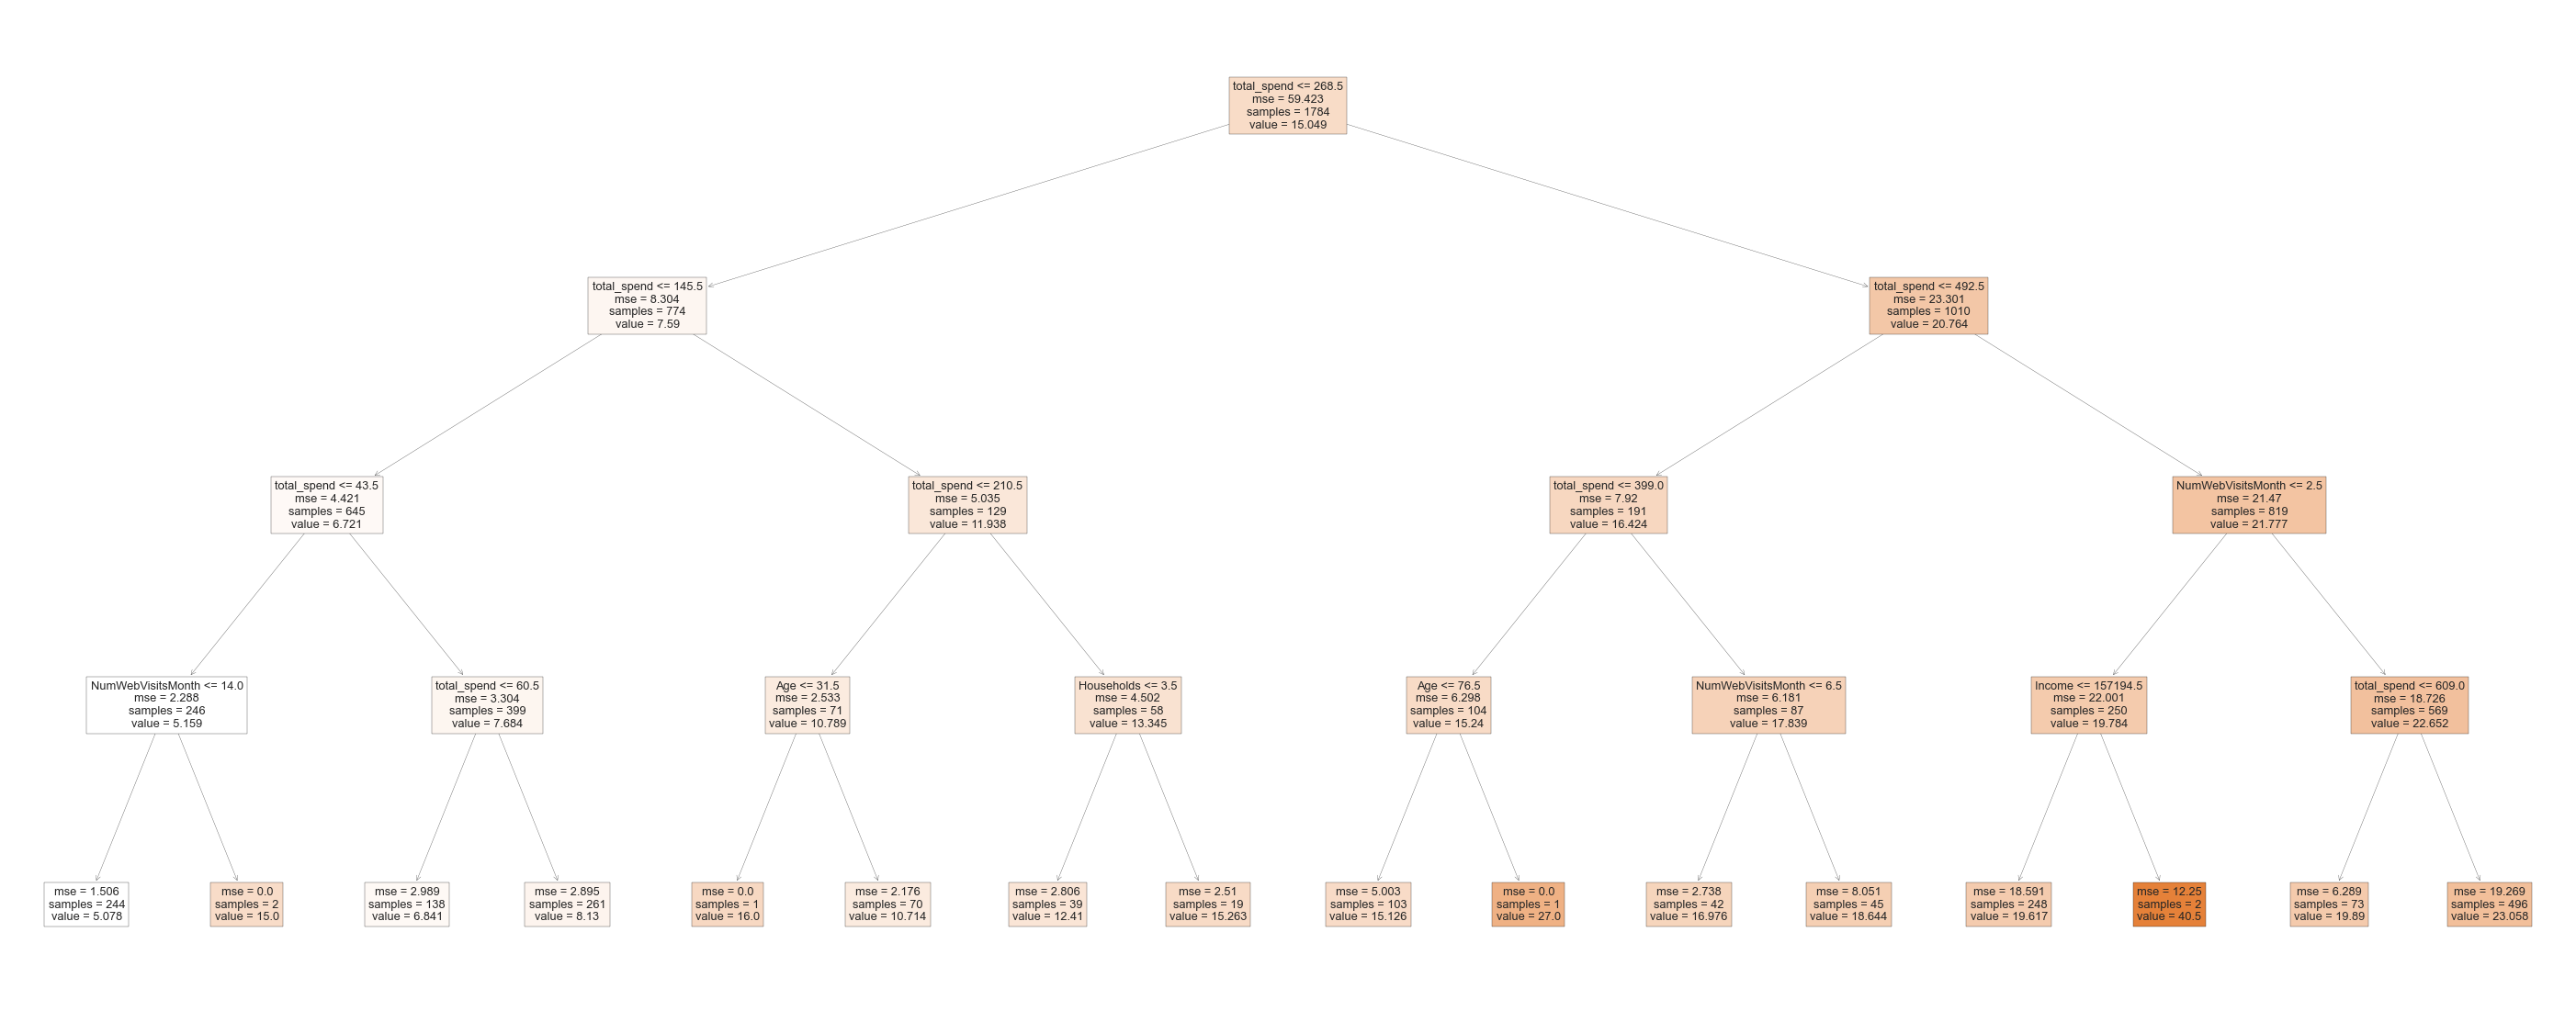

In [484]:
#회귀나무 plot 결과
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(50,20))
_ = tree.plot_tree(treereg, 
                   feature_names=['Age', 'Education', 'Income','NumWebVisitsMonth','Recency','total_spend', 'Households','Customer_Type'],
                   class_names=data.purchase_times,
                   filled=True)

# 회귀분석
전술했다싶이, 회귀나무는 목적변수가 연속형임, 따라서 분리할 때 연속형 변수를 구간화 처리 즉 비연속형으로 나눠주면서, 경계점 부근에서 에러가 날 수 있음. 그래서 예측하기엔 매우 적합하지 않음. 따라서 target을 구매횟수 x변수(독립변수)는 신규고객 설문조사지 내용을 가지고 다중회귀분석을 통해서 신규고객 구매횟수를 예측해볼 것임

In [485]:
data.head()

,Age,Education,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,Offline_Purchases,NumWebVisitsMonth,total_spend,Households,Spending_section,days_since_enrollment,MntWines_%,MntFruits_%,MntMeatProducts_%,MntFishProducts_%,MntSweetProducts_%,MntGoldProds_%,purchase_times,NumDealsPurchases_%,NumWebPurchases_%,NumCatalogPurchases_%,NumStorePurchases_%,Campaign_Success_Degree,Online_Purchases,Customer_Type
0,65,2,58138,58,635,88,546,172,88,88,4,7,1617,1,2,9,0.393,0.054,0.338,0.106,0.054,0.054,25,0.120,0.320,0.400,0.160,0,18,1
1,68,2,46344,38,11,1,6,2,1,6,2,5,27,3,1,7,0.407,0.037,0.222,0.074,0.037,0.222,6,0.333,0.167,0.167,0.333,0,2,0
2,57,2,71613,26,426,49,127,111,21,42,10,4,776,2,1,8,0.549,0.063,0.164,0.143,0.027,0.054,21,0.048,0.381,0.095,0.476,0,10,0
3,38,2,26646,26,11,4,20,10,3,5,4,6,53,3,1,7,0.208,0.075,0.377,0.189,0.057,0.094,8,0.250,0.250,0.000,0.500,0,2,0
4,41,5,58293,94,173,43,118,46,27,15,6,5,422,3,1,7,0.410,0.102,0.280,0.109,0.064,0.036,19,0.263,0.263,0.158,0.316,0,8,1


In [486]:
data.dtypes

Age                          int64
Education                    int32
Income                       int32
Recency                      int64
Wine                         int64
Fruit                        int64
Meat                         int64
Fish                         int64
Sweets                       int64
Gold                         int64
Offline_Purchases            int64
NumWebVisitsMonth            int64
total_spend                  int64
Households                   int64
Spending_section             int32
days_since_enrollment        int64
MntWines_%                 float64
MntFruits_%                float64
MntMeatProducts_%          float64
MntFishProducts_%          float64
MntSweetProducts_%         float64
MntGoldProds_%             float64
purchase_times               int64
NumDealsPurchases_%        float64
NumWebPurchases_%          float64
NumCatalogPurchases_%      float64
NumStorePurchases_%        float64
Campaign_Success_Degree      int64
Online_Purchases    

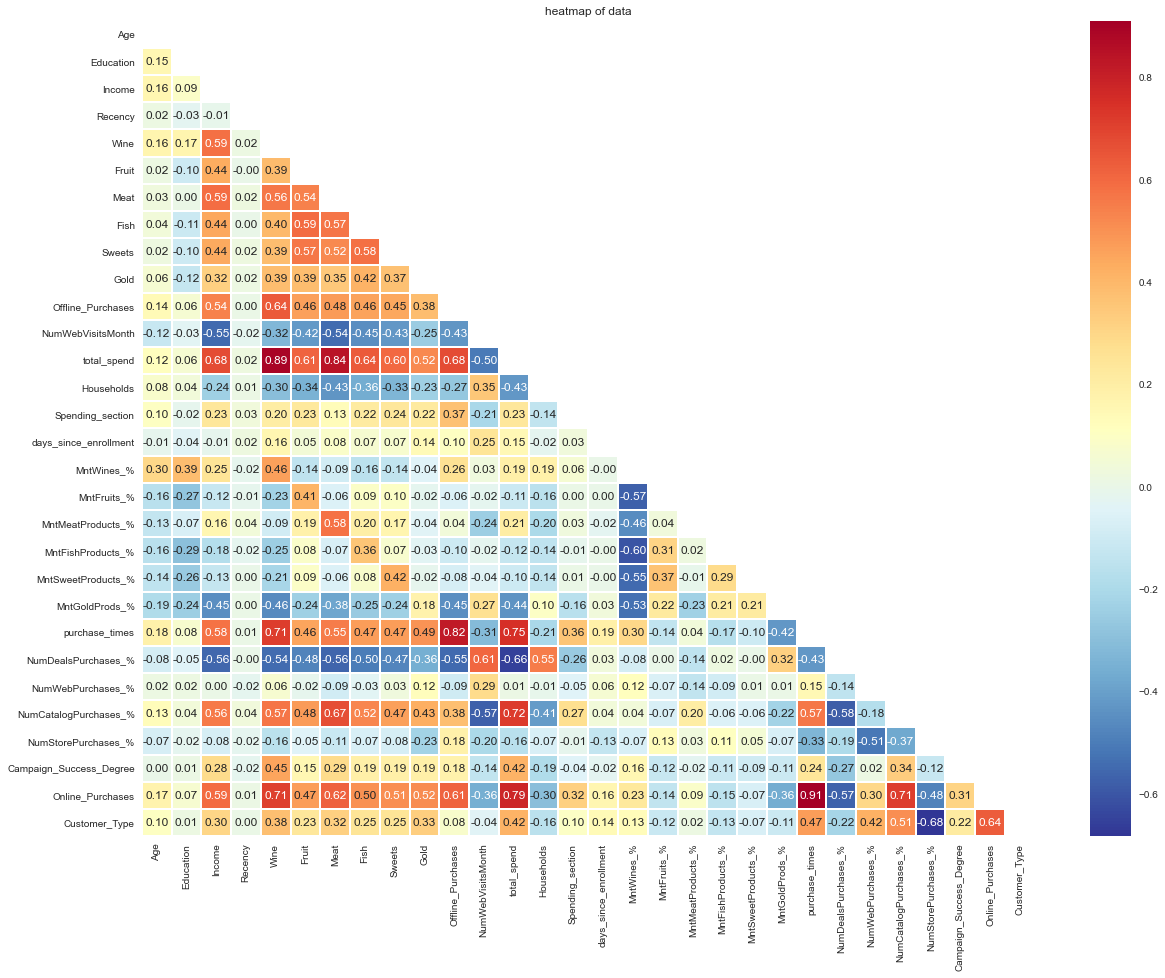

In [487]:
corr = data.corr()   
plt.figure(figsize = (20, 15))	
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True


sns.heatmap(data = corr,    
            annot = True,  
            mask=mask,   
            fmt = '.2f', 
            linewidths = 1., 
            cmap = 'RdYlBu_r')  
plt.title('heatmap of data')
plt.show()

In [488]:
import statsmodels.formula.api as smf

In [489]:
data.columns

Index(['Age', 'Education', 'Income', 'Recency', 'Wine', 'Fruit', 'Meat',
       'Fish', 'Sweets', 'Gold', 'Offline_Purchases', 'NumWebVisitsMonth',
       'total_spend', 'Households', 'Spending_section',
       'days_since_enrollment', 'MntWines_%', 'MntFruits_%',
       'MntMeatProducts_%', 'MntFishProducts_%', 'MntSweetProducts_%',
       'MntGoldProds_%', 'purchase_times', 'NumDealsPurchases_%',
       'NumWebPurchases_%', 'NumCatalogPurchases_%', 'NumStorePurchases_%',
       'Campaign_Success_Degree', 'Online_Purchases', 'Customer_Type'],
      dtype='object')

In [490]:
#x3는 신규고객이 설문할때 기입할 개인정보내용임.
from sklearn.model_selection import train_test_split
x3 = data[['Age', 'Education', 'Income','NumWebVisitsMonth','total_spend', 'Recency', 'Households','Customer_Type']]
y3 = data[['purchase_times']]
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, train_size=0.8, test_size=0.2)

In [491]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
prediction_of_spend = mlr.fit(x_train3, y_train3) 
prediction_of_spend

LinearRegression()

In [492]:
#기존고객의 개인정보
data[['Age', 'Education', 'Income','NumWebVisitsMonth','total_spend', 'Recency', 'Households','Customer_Type','purchase_times']].head()

,Age,Education,Income,NumWebVisitsMonth,total_spend,Recency,Households,Customer_Type,purchase_times
0,65,2,58138,7,1617,58,1,1,25
1,68,2,46344,5,27,38,3,0,6
2,57,2,71613,4,776,26,2,0,21
3,38,2,26646,6,53,26,3,0,8
4,41,5,58293,5,422,94,3,1,19


In [493]:
#만약에 신규고객인 chan의 개인정보가 age=23, education:2, ~~~ customer_Type:1(offline 구매 선호)라 입력하고
#chan 고객의 개인정보를 기반으로 얼마나 구매할지 예측해볼 것임
chan_customer_information = [[23,2,58138,7,1617, 58,1,1]]
my_predict = prediction_of_spend.predict(chan_customer_information)

In [494]:
#chan의 구매횟수는 다음과 같이 예측됨 chan고객의 개인정보로 회귀분석시 42개 구매할 것으로 예측됨
print("Chan customer estimate of Purchase_times is...")
print(my_predict)

Chan customer estimate of Purchase_times is...
[[23.08346212]]


In [495]:
y_predict3 = mlr.predict(x_test3)

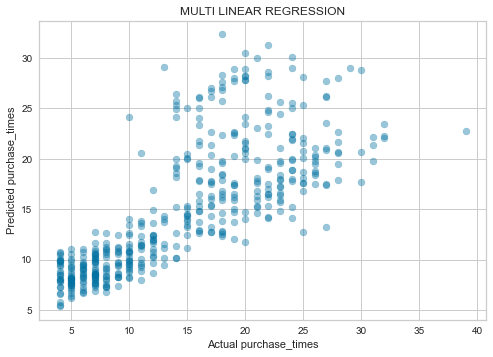

In [496]:
#처음엔 잘 적합하다가 구매횟수가 늘어날 수록 오차가 존재.. 하지만 선형도는 뚜렷하게 보임
plt.scatter(y_test3, y_predict3, alpha=0.4)
plt.xlabel("Actual purchase_times")
plt.ylabel("Predicted purchase_times")
plt.title("MULTI LINEAR REGRESSION")
plt.show()

In [497]:
#우리가 만든 다중회귀분석 모델의 회귀계수
print(mlr.coef_)

[[ 4.56866149e-02  3.88288097e-02  3.01845481e-05  1.93353041e-01
   8.95731417e-03 -3.65835568e-03  9.23458592e-01  2.60284560e+00]]


In [498]:
#우리가 만든 다중회귀분석 모델의 절편값
print(mlr.intercept_)

[1.04857523]


In [499]:
#다중회귀분석 모델 score는 다음과 같음 63.7%
#양호하나 더 양호한 모델을 만들기 위해서 전처리할때 이상치를 제거하면 더 정확한 값이 나올 거라고 예상함
print(mlr.score(x_train3, y_train3))

0.6346175659069342


In [500]:
mean_squared_error(y_test3, mlr.predict(x_test3))

23.50448309931539

In [501]:
mean_squared_error(y_train3, mlr.predict(x_train3))

21.6208500281523

kfold validation for MUNLTIPLE LINEAR REGRESSION

In [502]:
from sklearn.model_selection import cross_val_predict, KFold, cross_val_score, LeaveOneOut

In [503]:
x5 = data 
y5 = data.purchase_times

In [504]:
lm5 = linear_model.LinearRegression()

In [505]:
n_splits = 3
kfold_cv = KFold(n_splits = n_splits) 

In [506]:
y_pred5 = cross_val_predict(lm5, x5, y5, cv = kfold_cv) 

In [510]:
print('CV MSE : ', np.mean(cross_val_score(lm5, x5, y5, cv = kfold_cv, scoring = 'neg_mean_squared_error')))

CV MSE :  -5.2881348874591885e-23


In [524]:
x6 = data 
y6 = data.purchase_times

In [525]:
lm6 = linear_model.LinearRegression()

In [526]:
n_splits = 5
kfold_cv2 = KFold(n_splits = n_splits) 

In [527]:
y_pred6 = cross_val_predict(lm6, x6, y6, cv = kfold_cv2) 

In [529]:
print('CV MSE : ', np.mean(cross_val_score(lm6, x6, y6, cv = kfold_cv2, scoring = 'neg_mean_squared_error')))

CV MSE :  -5.2881348874591885e-23
